# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
import os
import random
from itertools import accumulate

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:

def chunks(cities, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(cities), 50):
        yield cities[i:i + n]
indices = (list(chunks(cities, 50))) 
len(indices)

13

In [13]:
City_data = []
Cloudiness = []
Country = []
Date = []
Humidity = []
lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
city_test = []
response_json = []
data = []  
record = 0
sets = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
        
for i in indices:
    for cit in i:
        query = f"{url}appid={weather_api_key}&units={units}&q={cit}"
        response_json = requests.get(query)
        response1 = response_json.json()
        try:
            data.append(response1)
            City_data.append(response1["name"])
            Cloudiness.append(response1["clouds"]["all"])
            Country.append(response1["sys"]["country"])
            Date.append(response1["dt"])
            Humidity.append(response1["main"]["humidity"])
            lat.append(response1['coord']['lat'])
            Lng.append(response1["coord"]["lon"])
            Max_Temp.append(response1["main"]["temp_max"])
            Wind_Speed.append(response1["wind"]["speed"])
            print(f"Processing Record of Set | {cit}")
                         
        except:
            print("City not found. Skipping...")
        pass


Processing Record of Set | lockhart
Processing Record of Set | khatanga
Processing Record of Set | kavieng
Processing Record of Set | imeni karla libknekhta
Processing Record of Set | bethel
Processing Record of Set | berlevag
Processing Record of Set | chokurdakh
Processing Record of Set | arlit
Processing Record of Set | tura
Processing Record of Set | tiksi
Processing Record of Set | duayaw nkwanta
Processing Record of Set | vaini
Processing Record of Set | hirara
Processing Record of Set | akonolinga
Processing Record of Set | geraldton
Processing Record of Set | bluff
Processing Record of Set | yellowknife
Processing Record of Set | cape town
Processing Record of Set | petatlan
Processing Record of Set | ushuaia
City not found. Skipping...
Processing Record of Set | balabac
City not found. Skipping...
Processing Record of Set | hilo
City not found. Skipping...
Processing Record of Set | upernavik
Processing Record of Set | rikitea
Processing Record of Set | tobermory
Processing Re

Processing Record of Set | banjarmasin
Processing Record of Set | rong kwang
Processing Record of Set | turan
Processing Record of Set | lagoa
Processing Record of Set | kenai
Processing Record of Set | tutoia
Processing Record of Set | klaksvik
Processing Record of Set | plastun
Processing Record of Set | caravelas
Processing Record of Set | la paz
City not found. Skipping...
Processing Record of Set | coquimbo
Processing Record of Set | baghdad
Processing Record of Set | mount gambier
Processing Record of Set | abong mbang
Processing Record of Set | ambositra
City not found. Skipping...
Processing Record of Set | saskylakh
Processing Record of Set | kahului
Processing Record of Set | whitehorse
Processing Record of Set | ancud
Processing Record of Set | tigil
Processing Record of Set | westport
Processing Record of Set | soledade
Processing Record of Set | khasan
Processing Record of Set | seddon
Processing Record of Set | bundaberg
Processing Record of Set | praya
Processing Record 

City not found. Skipping...
Processing Record of Set | hambantota
Processing Record of Set | krasnozerskoye
Processing Record of Set | mayumba
Processing Record of Set | itirapina
Processing Record of Set | nizhniy baskunchak
Processing Record of Set | srandakan
Processing Record of Set | sokoni
Processing Record of Set | copala
Processing Record of Set | scarborough
Processing Record of Set | mayo
Processing Record of Set | makakilo city
Processing Record of Set | la ronge
Processing Record of Set | zarichne
City not found. Skipping...
Processing Record of Set | sharan
Processing Record of Set | micheweni
Processing Record of Set | mokhsogollokh
Processing Record of Set | coahuayana
Processing Record of Set | tiarei
Processing Record of Set | agogo
Processing Record of Set | dalby
Processing Record of Set | hami
Processing Record of Set | nova granada
Processing Record of Set | leshukonskoye
Processing Record of Set | george town
Processing Record of Set | chicama
Processing Record of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weather_dict = pd.DataFrame({
    "Cities": City_data,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
})
weather_dict

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lockhart,1,US,1586662129,78,28.62,-81.44,73.99,10.29
1,Khatanga,100,RU,1586662129,97,71.97,102.50,17.96,11.74
2,Kavieng,95,PG,1586662129,69,-2.57,150.80,84.36,3.56
3,Imeni Karla Libknekhta,0,RU,1586662130,89,51.62,35.48,31.12,9.91
4,Bethel,1,US,1586662130,69,41.37,-73.41,46.40,4.70
...,...,...,...,...,...,...,...,...,...
559,Kamphaeng Phet,62,TH,1586662318,20,16.48,99.52,96.01,3.94
560,Ridgecrest,1,US,1586662319,48,35.62,-117.67,62.60,10.29
561,Kholodnyy,59,RU,1586662319,83,62.72,147.95,25.54,2.93
562,Kibala,99,TD,1586662319,78,9.11,18.35,73.40,3.51


In [15]:
weather_dict.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


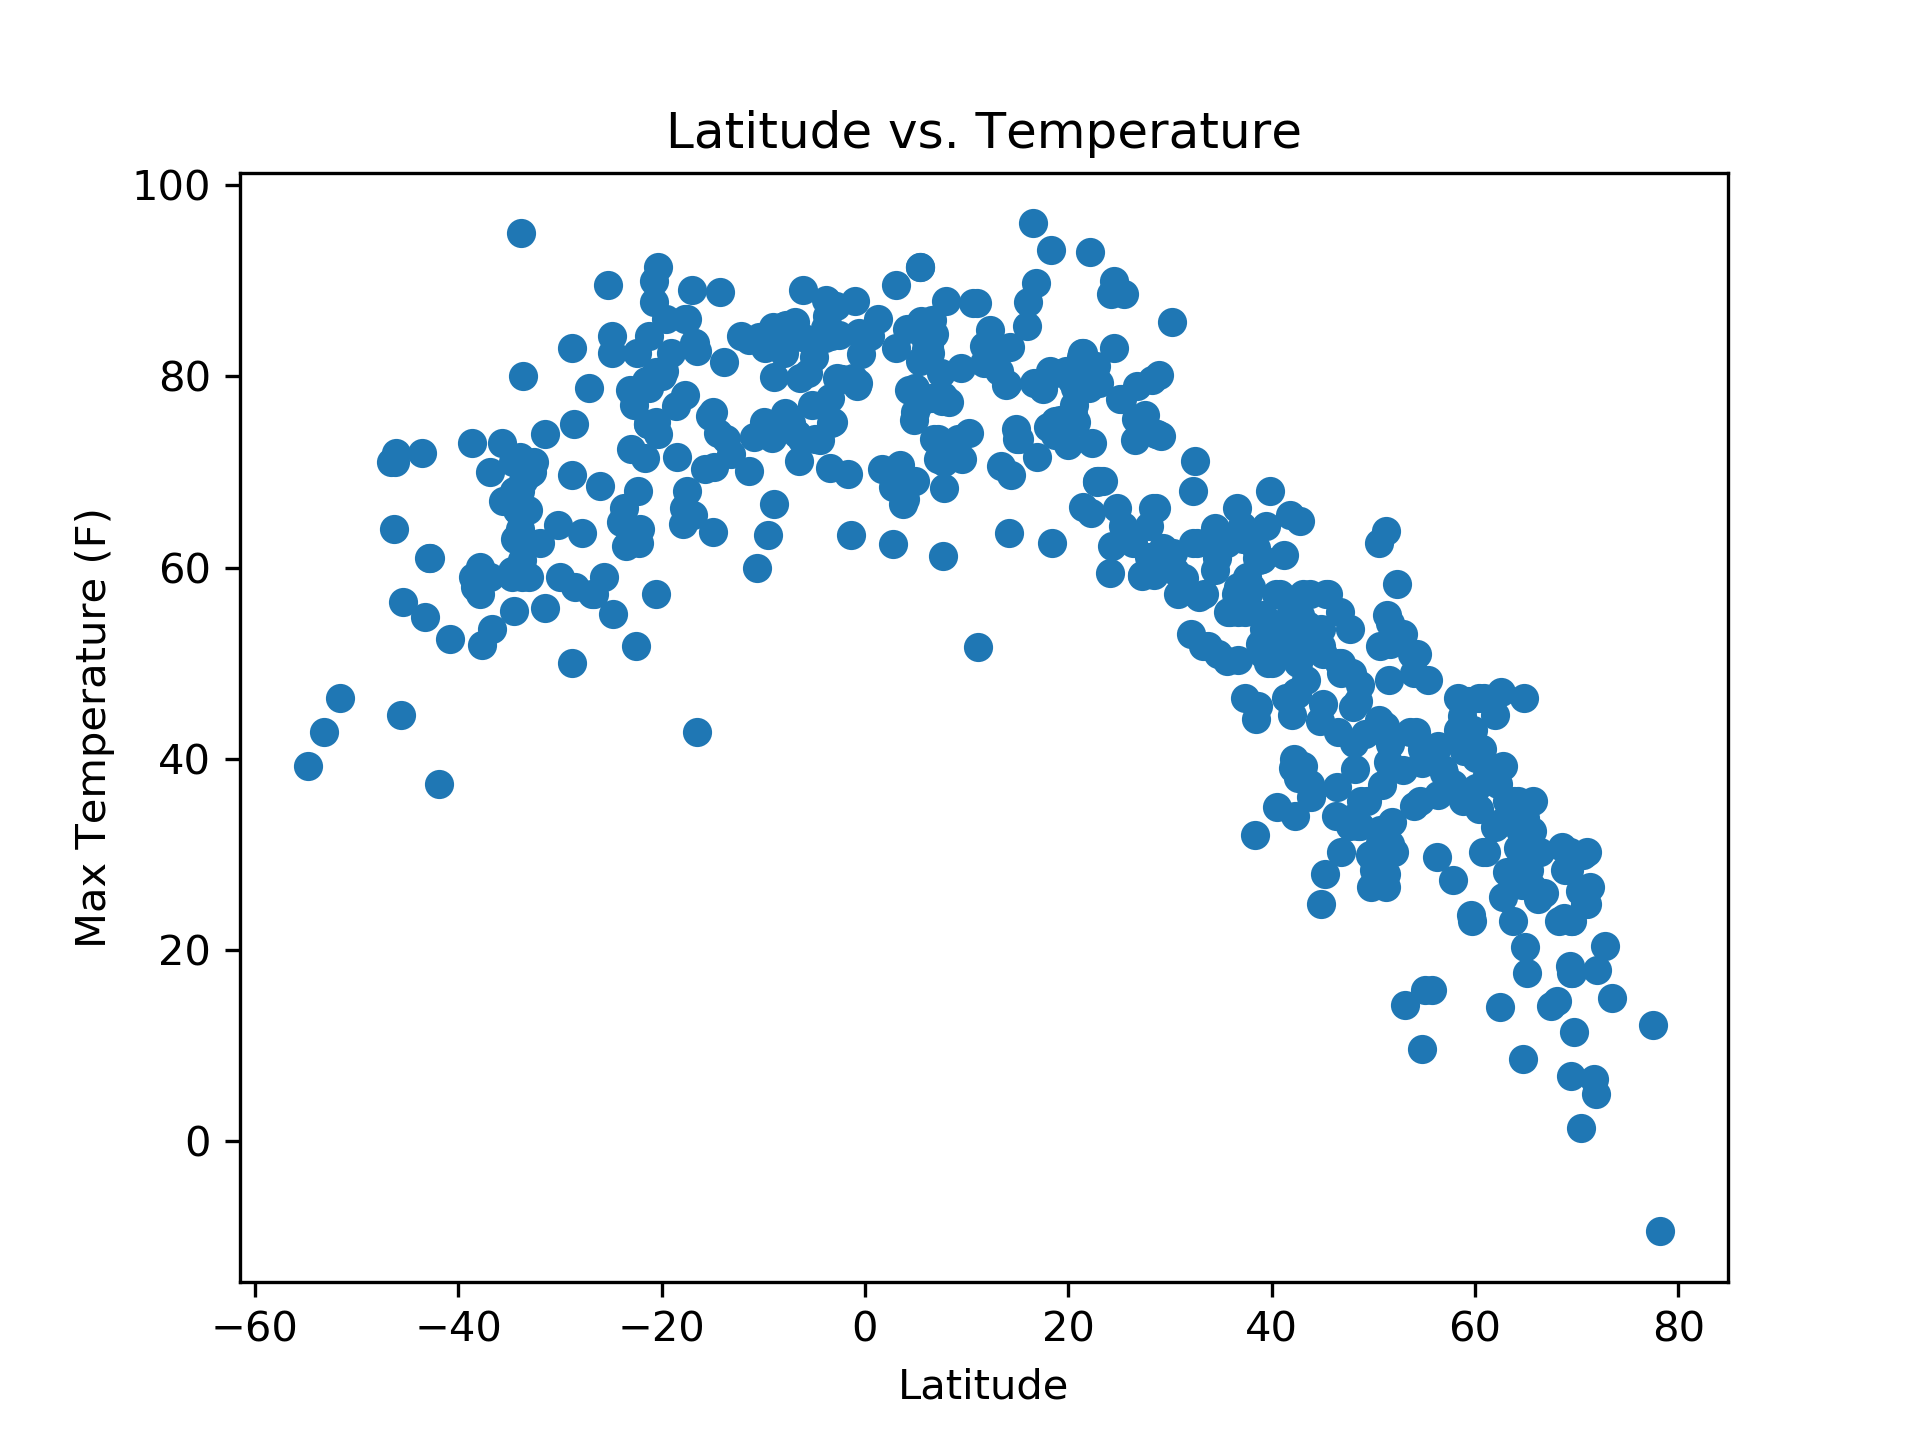

This graph took the latitudes and temps from my data frame and plotted it in a curve much like we would excpect to see. The lats closest to 0 are higher and it drops off in temp as it moves awat from the equator.


In [16]:
x_values = weather_dict["Lat"]
y_values = weather_dict["Max Temp"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Temperature")
plt.savefig("output_data/Lat_Temp_Plot.png")
plt.ioff()
plt.show()
print("This graph took the latitudes and temps from my data frame and plotted it in a curve much like we would excpect to see. The lats closest to 0 are higher and it drops off in temp as it moves awat from the equator.")

#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


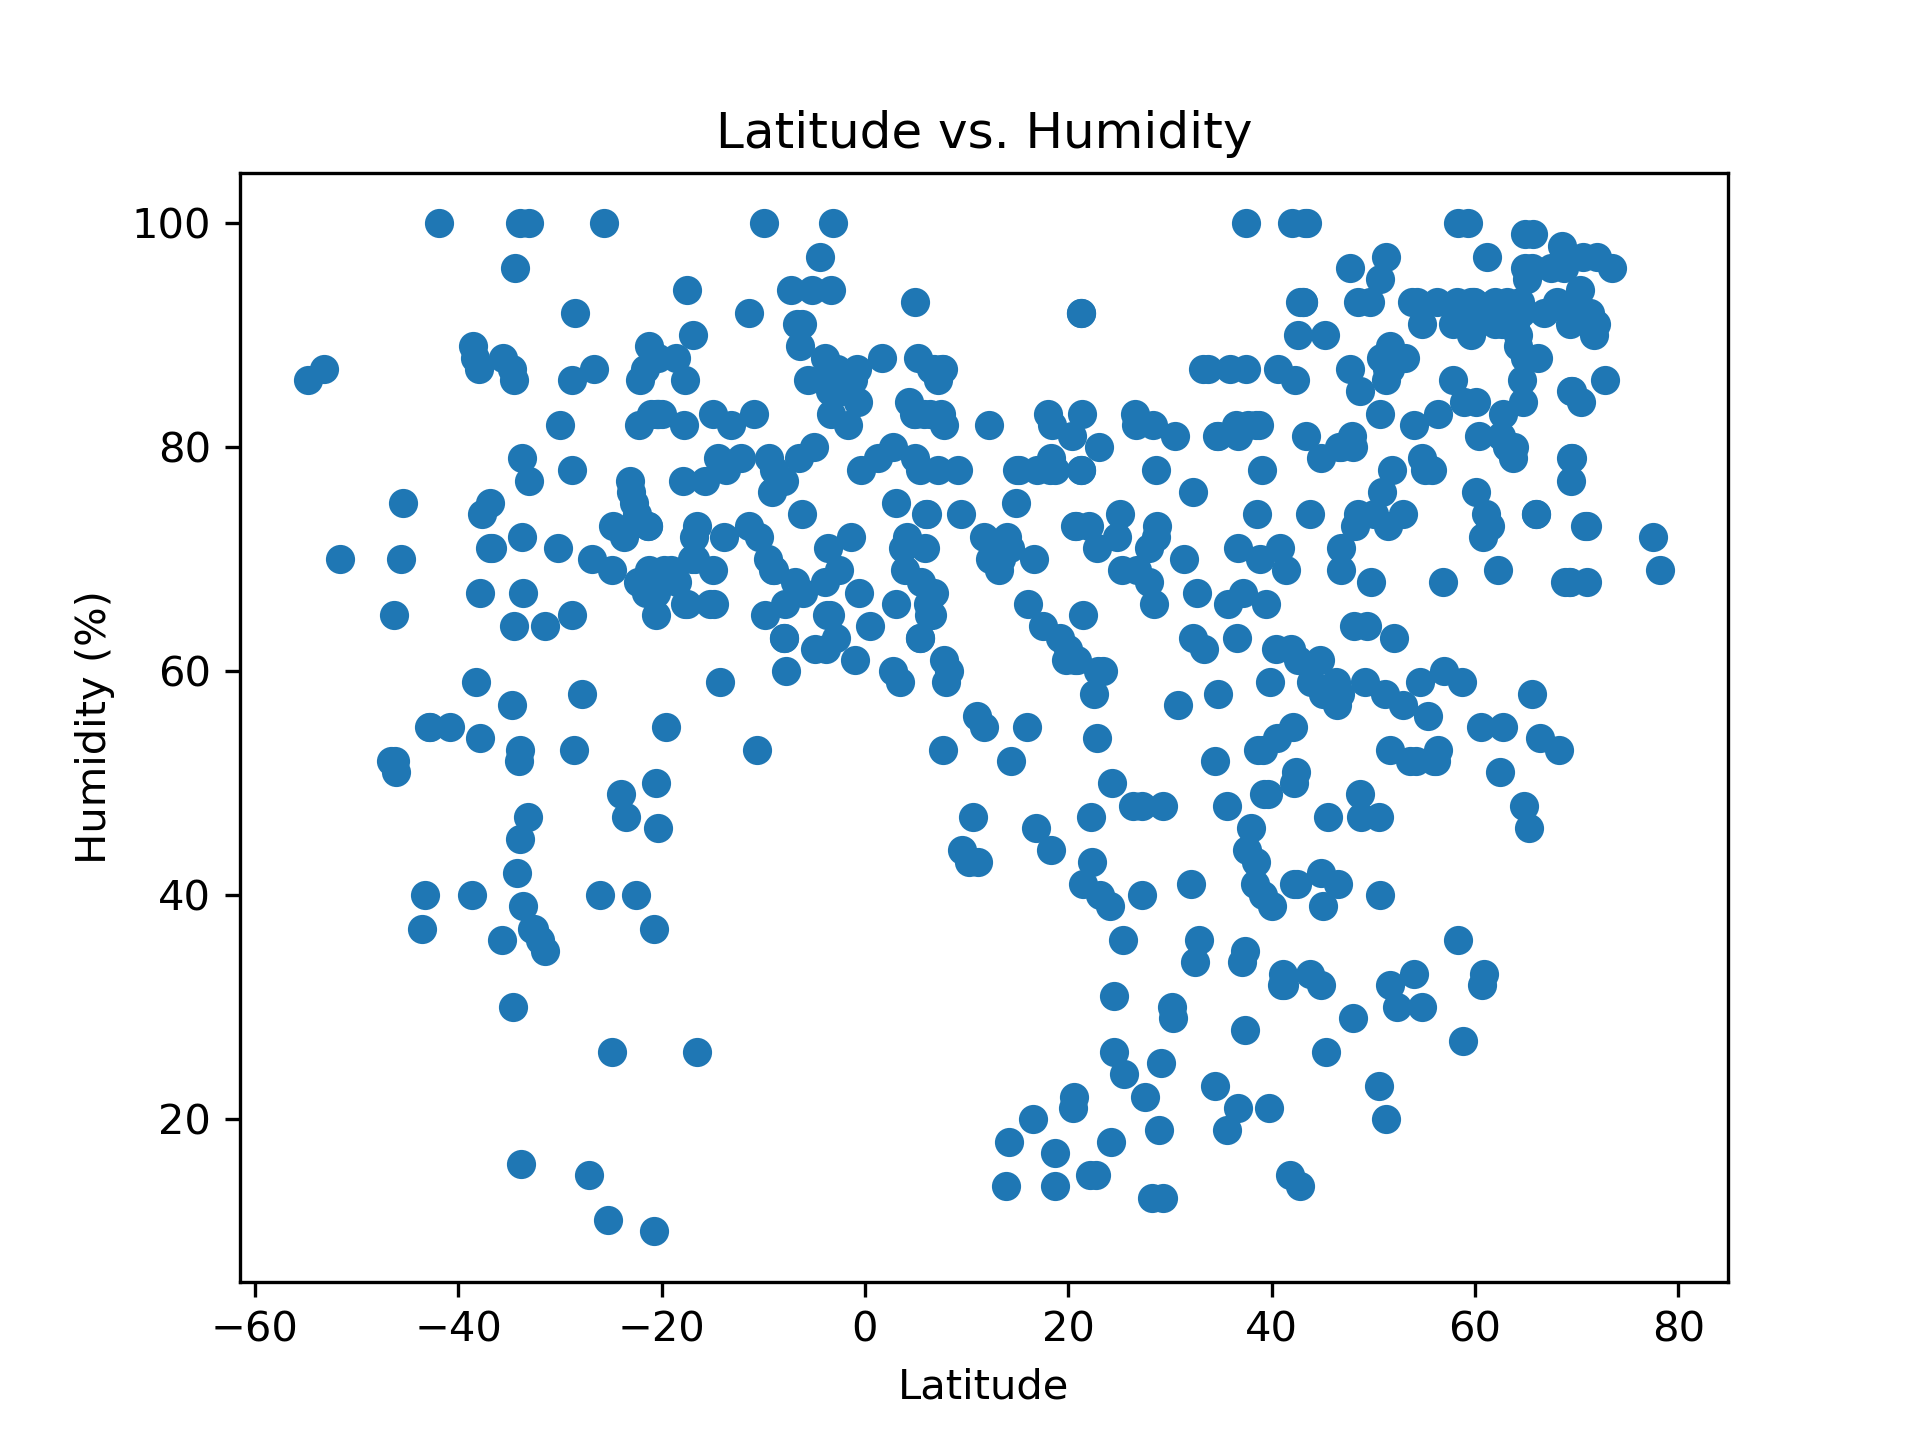

This graph took lats and humidity from my dataframe and plotted it. There seems to be little correlation.


In [17]:
x_value = weather_dict["Lat"]
y_value = weather_dict["Humidity"]
plt.scatter(x_value, y_value)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")
plt.savefig("output_data/Lat_Hum_Plot.png")
plt.show()
print("This graph took lats and humidity from my dataframe and plotted it. There seems to be little correlation.")

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


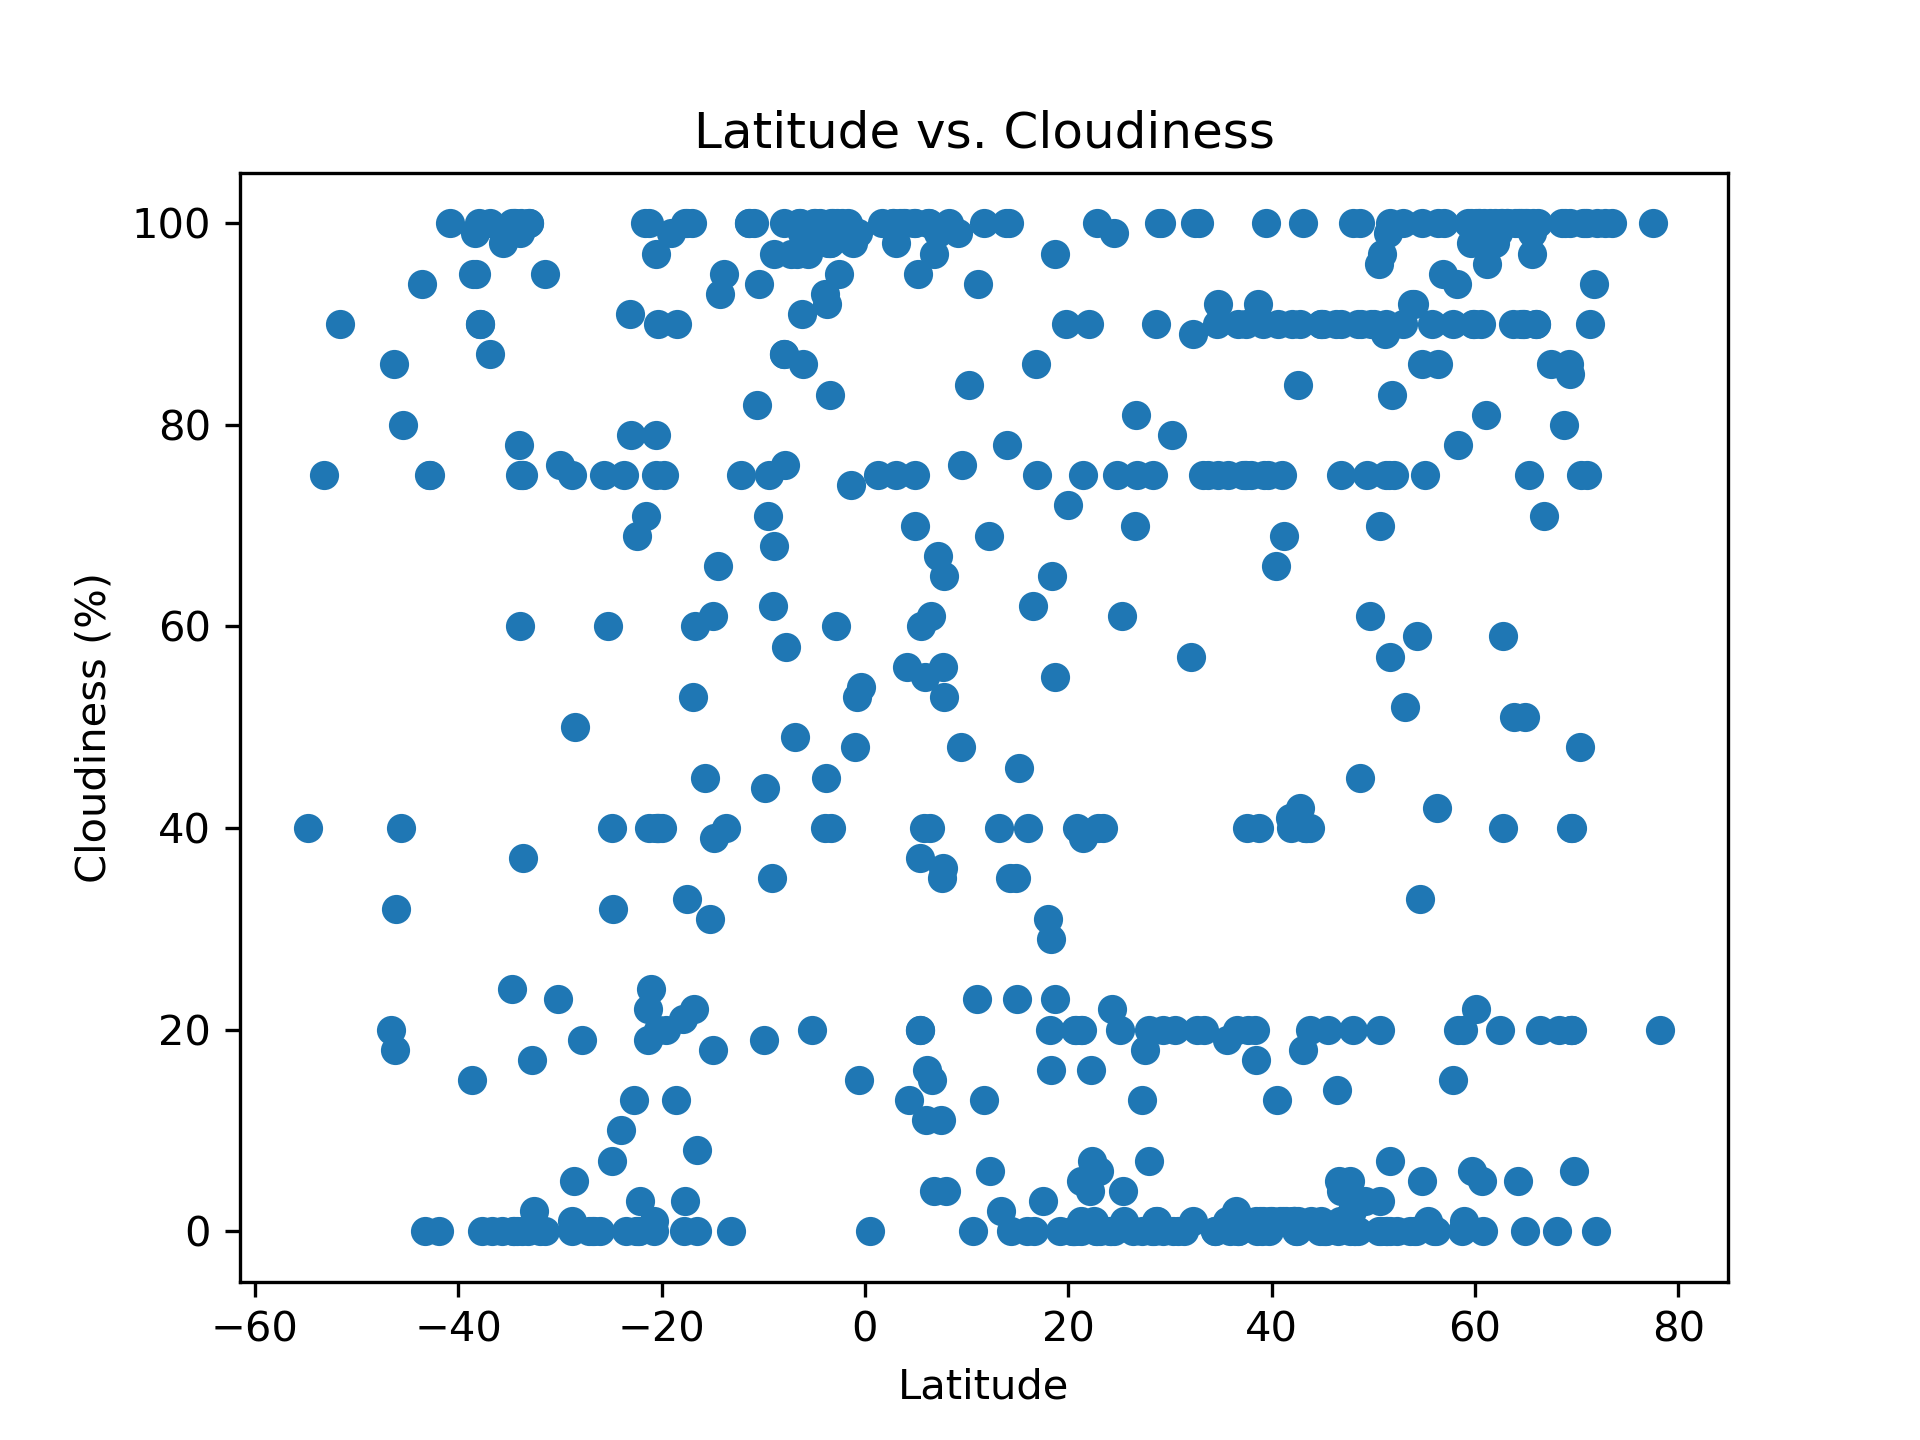

The cloudiness is interesting, because there are strips of data along certain percentages. I am going to guess that is because when people enter the data they like to use landmark numbers.


In [18]:
x_valu = weather_dict["Lat"]
y_valu = weather_dict["Cloudiness"]
plt.scatter(x_valu, y_valu)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")
plt.savefig("output_data/Lat_Cloud_Plot.png")
plt.show()
print("The cloudiness is interesting, because there are strips of data along certain percentages. I am going to guess that is because when people enter the data they like to use landmark numbers.")

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


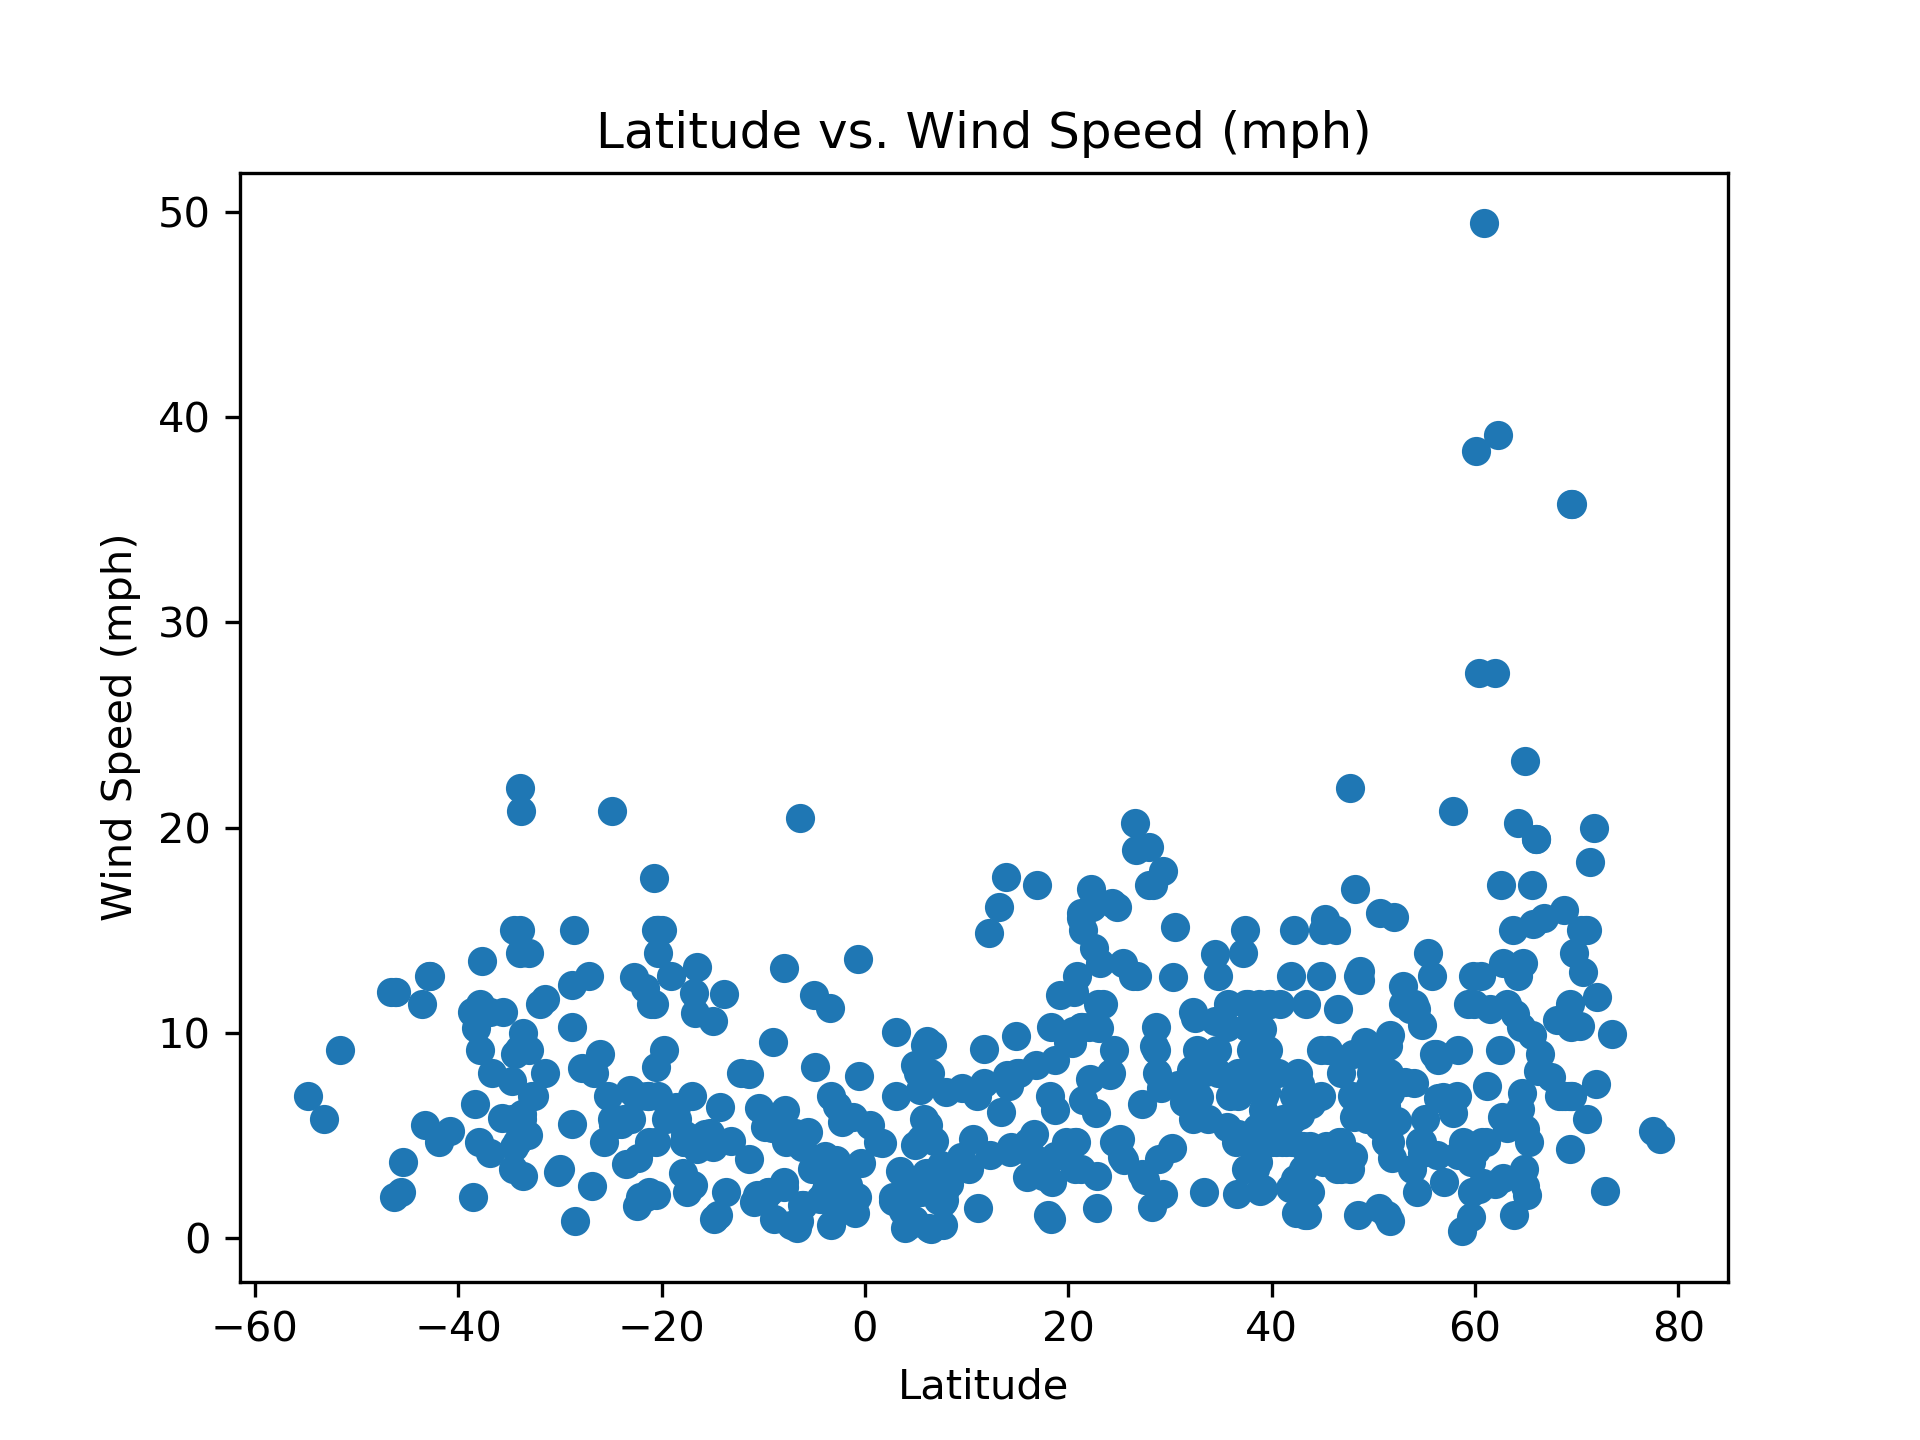

For the most part, wind speeds cluster at low speeds. There are higher wind speeds in the northern hem, and I am going to guess because there are more mountains inhabited in the northern hem; higher altitude means faster winds.


In [19]:
x_val = weather_dict["Lat"]
y_val = weather_dict["Wind Speed"]
plt.scatter(x_val, y_val)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed (mph)")
plt.savefig("output_data/Lat_Wind_Plot.png")
plt.show()
print("For the most part, wind speeds cluster at low speeds. There are higher wind speeds in the northern hem, and I am going to guess because there are more mountains inhabited in the northern hem; higher altitude means faster winds.")

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_v, y_v)
# regress_values = x_v * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [21]:
# Create Northern and Southern Hemisphere DataFrames

north_hem = weather_dict.loc[weather_dict["Lat"] > 0]
south_hem = weather_dict.loc[weather_dict["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.895455772987598


<IPython.core.display.Javascript object>


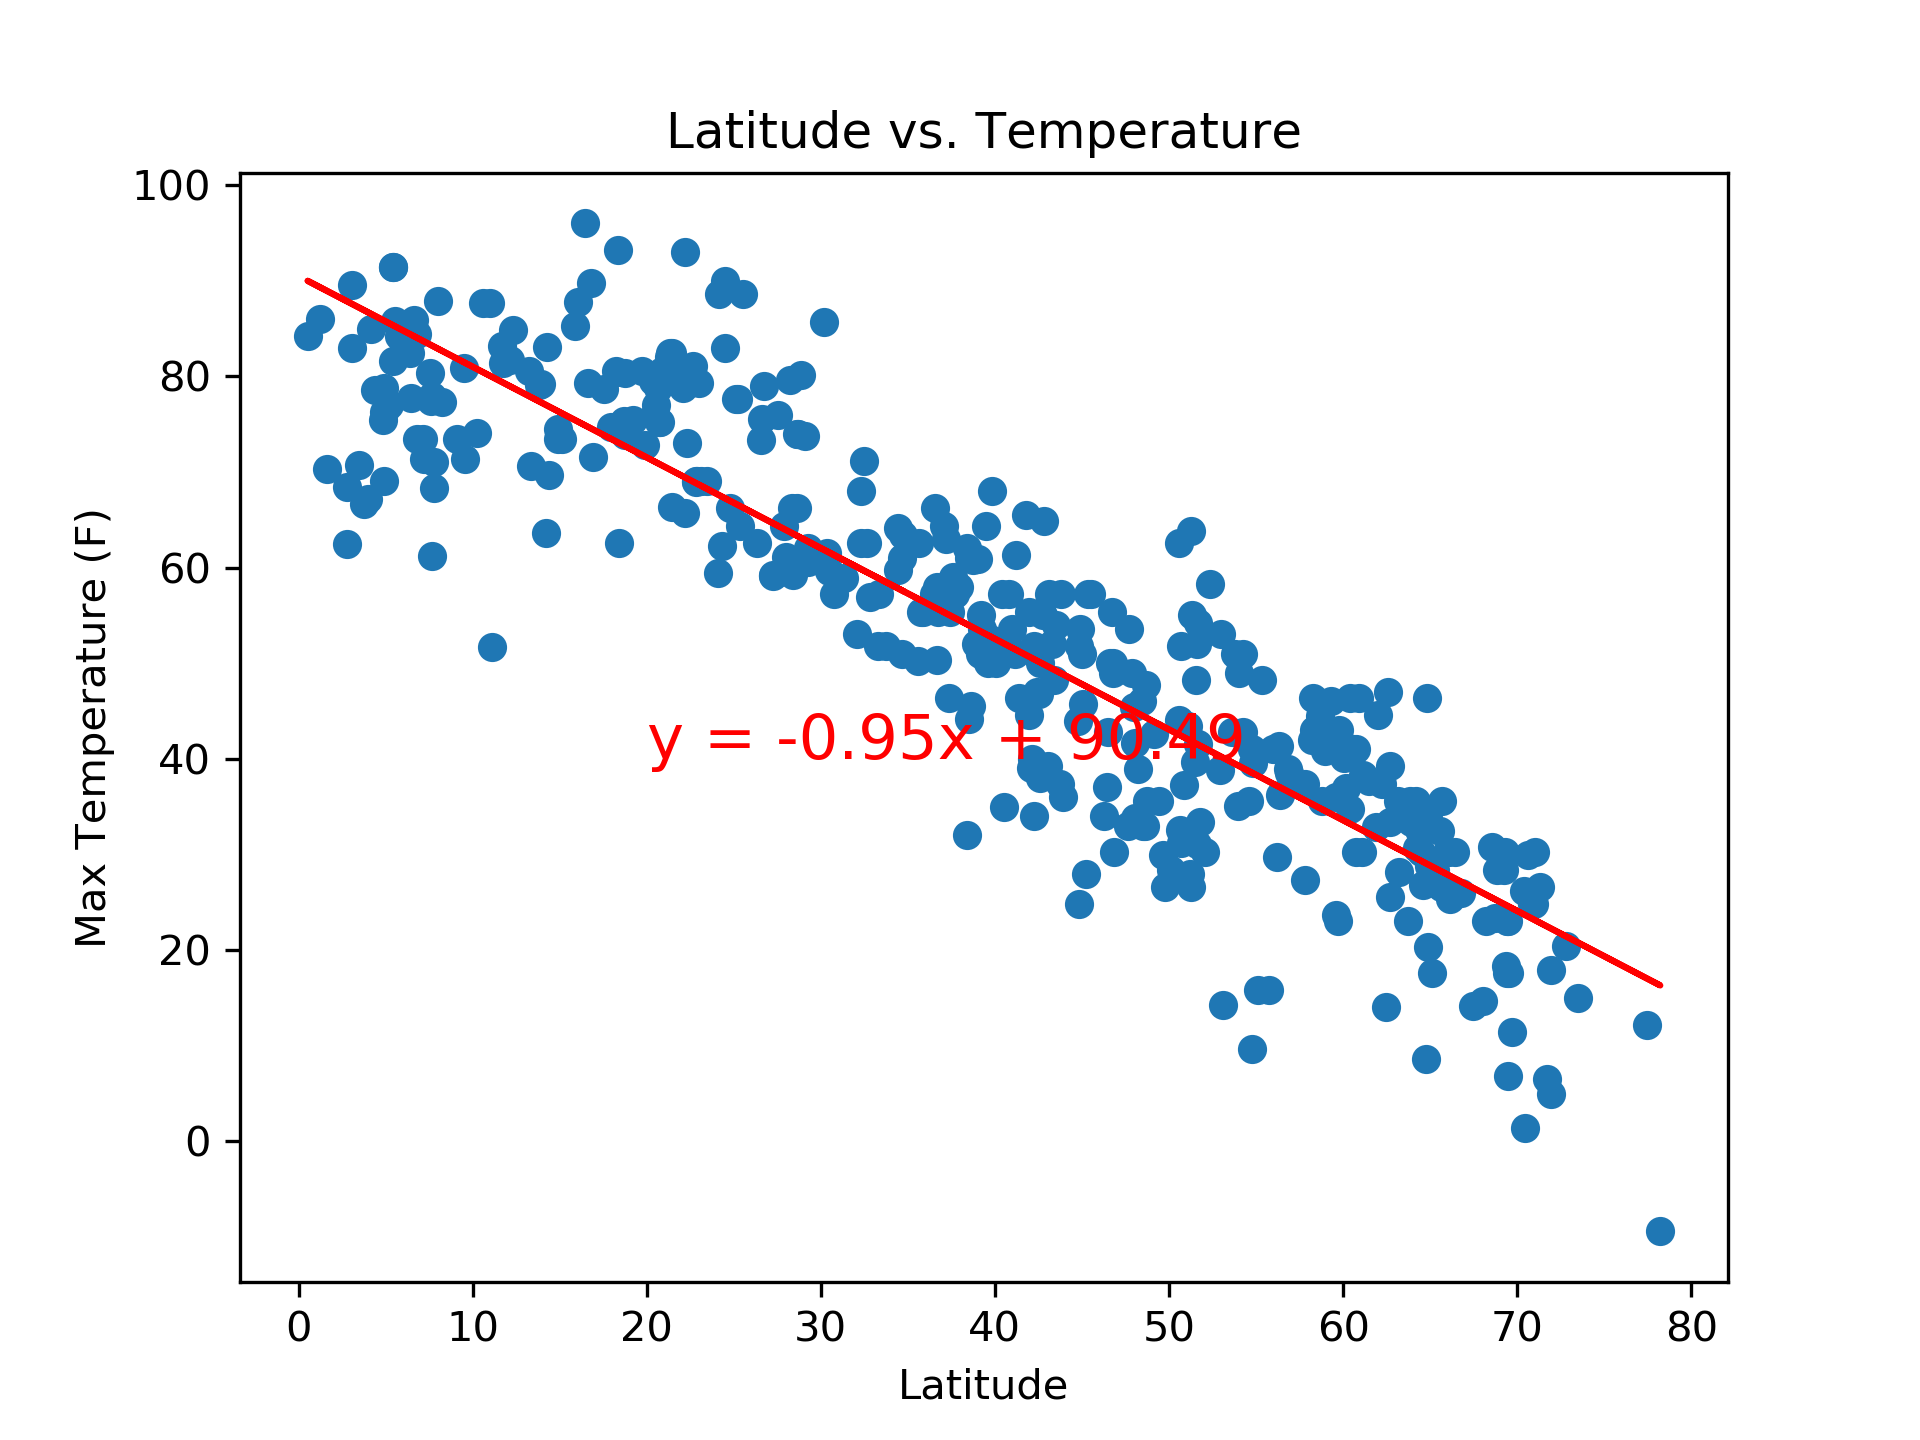

In [22]:
x_v = north_hem["Lat"]
y_v = north_hem["Max Temp"]
plt.scatter(x_v, y_v)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Temperature")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_v, y_v)
regress_values = x_v * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_v,regress_values,"r-")
plt.annotate(line_eq, (20,40), fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Lat_Temp_LR.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6247525361249486


<IPython.core.display.Javascript object>


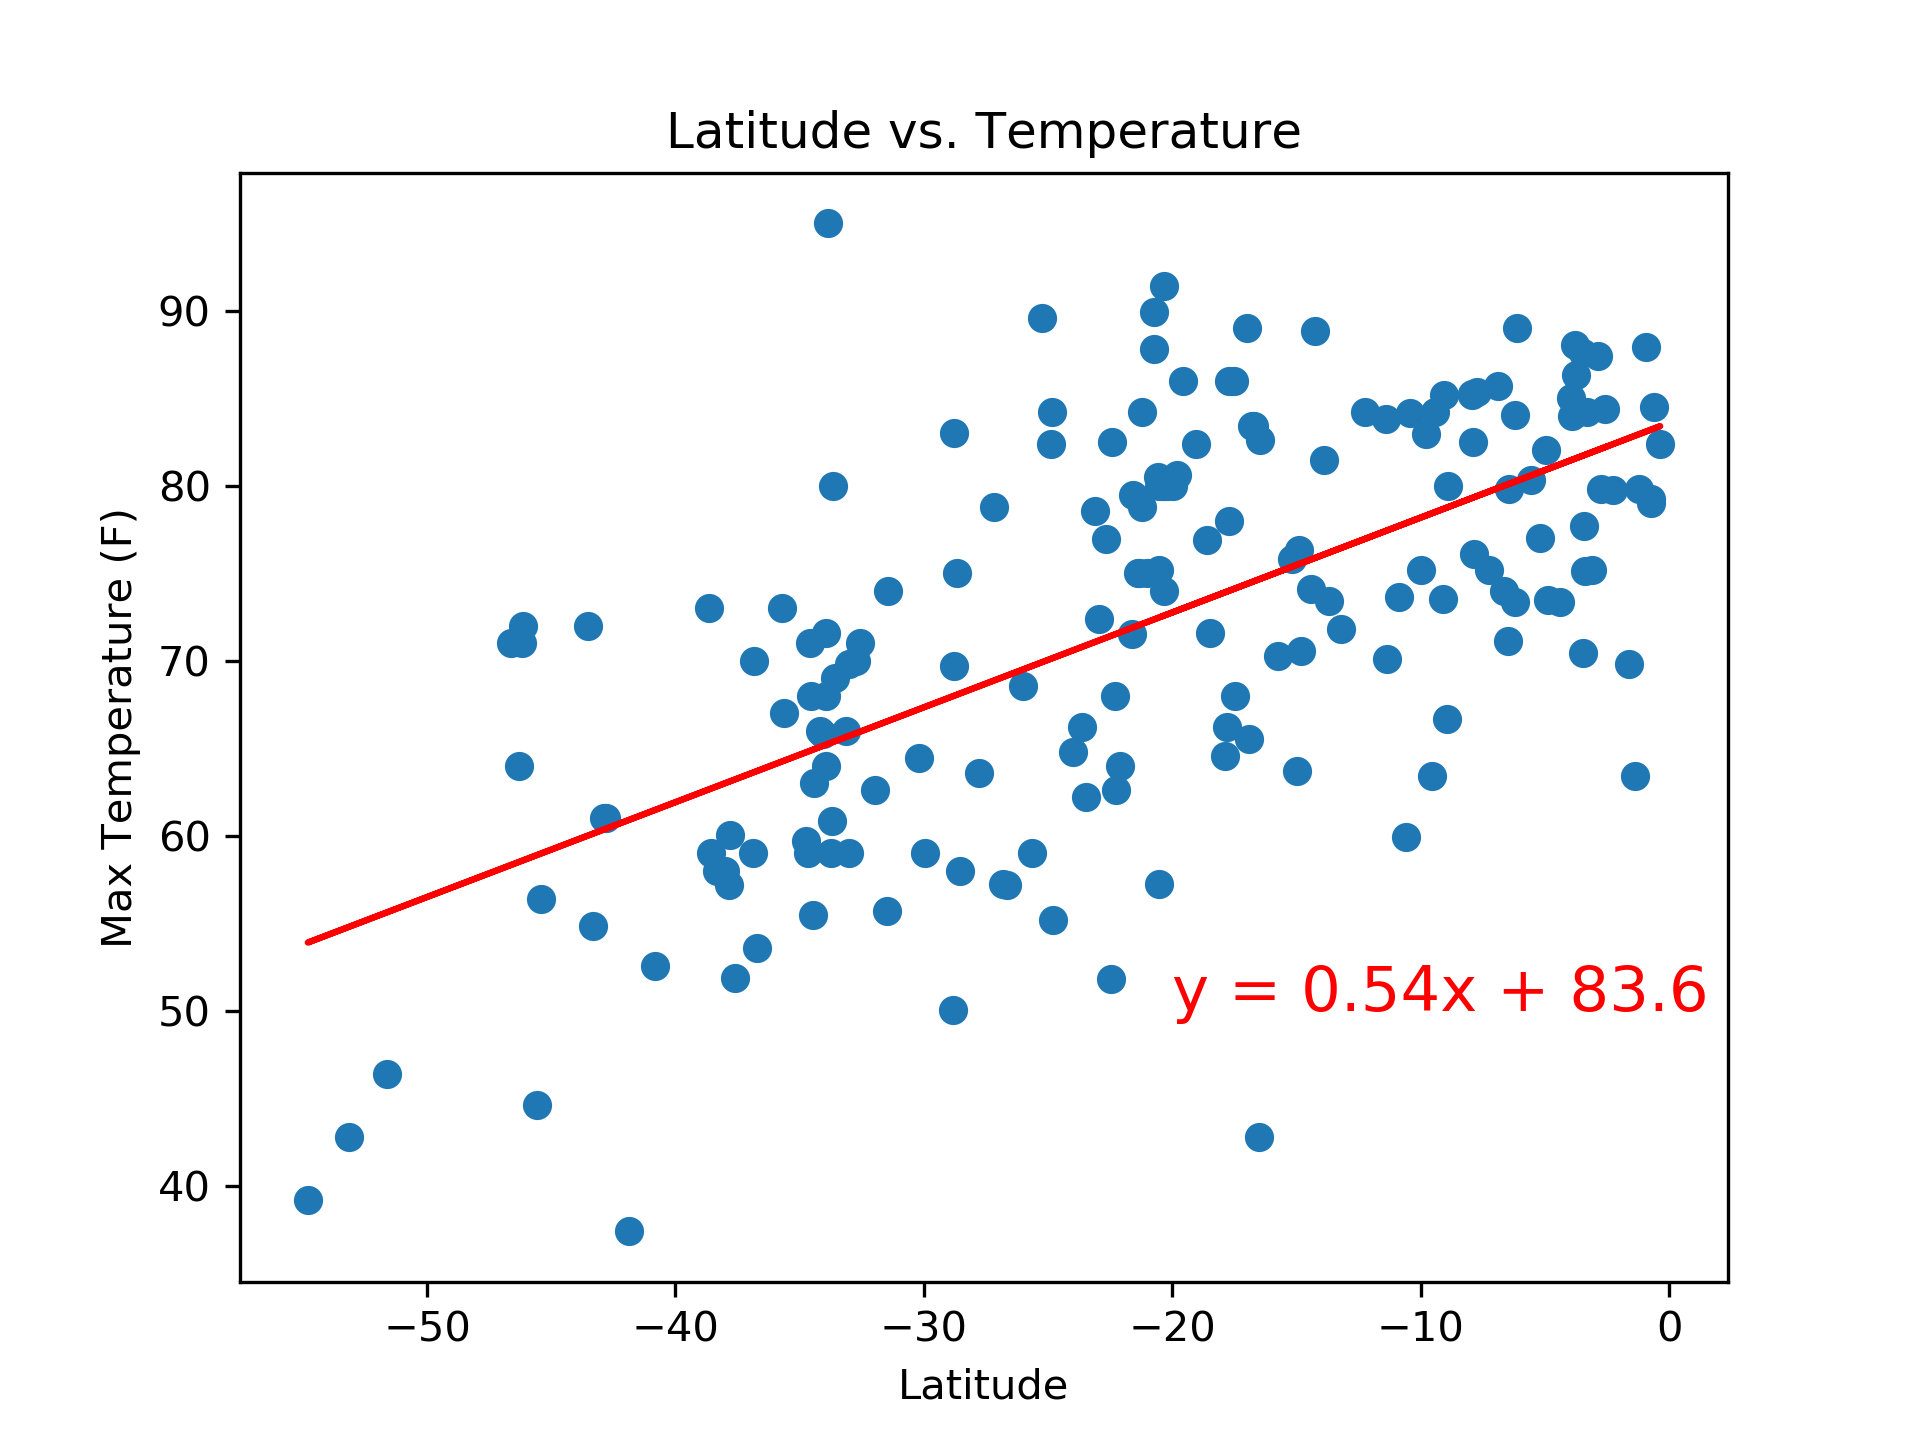

Just like the temp plot above, we expect to see temperatures drop as the lat moves away from 0, and this depicts that exactly.


In [23]:
x_v1 = south_hem["Lat"]
y_v1 = south_hem["Max Temp"]
plt.scatter(x_v1, y_v1)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Temperature")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_v1, y_v1)
regress_values = x_v1 * slope + intercept
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_v1,regress_values,"r-")
plt.annotate(line_eq1, (-20,50), fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Lat_Temp_LRsouth.png")
plt.show()
print("Just like the temp plot above, we expect to see temperatures drop as the lat moves away from 0, and this depicts that exactly.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.22494561621258113


<IPython.core.display.Javascript object>


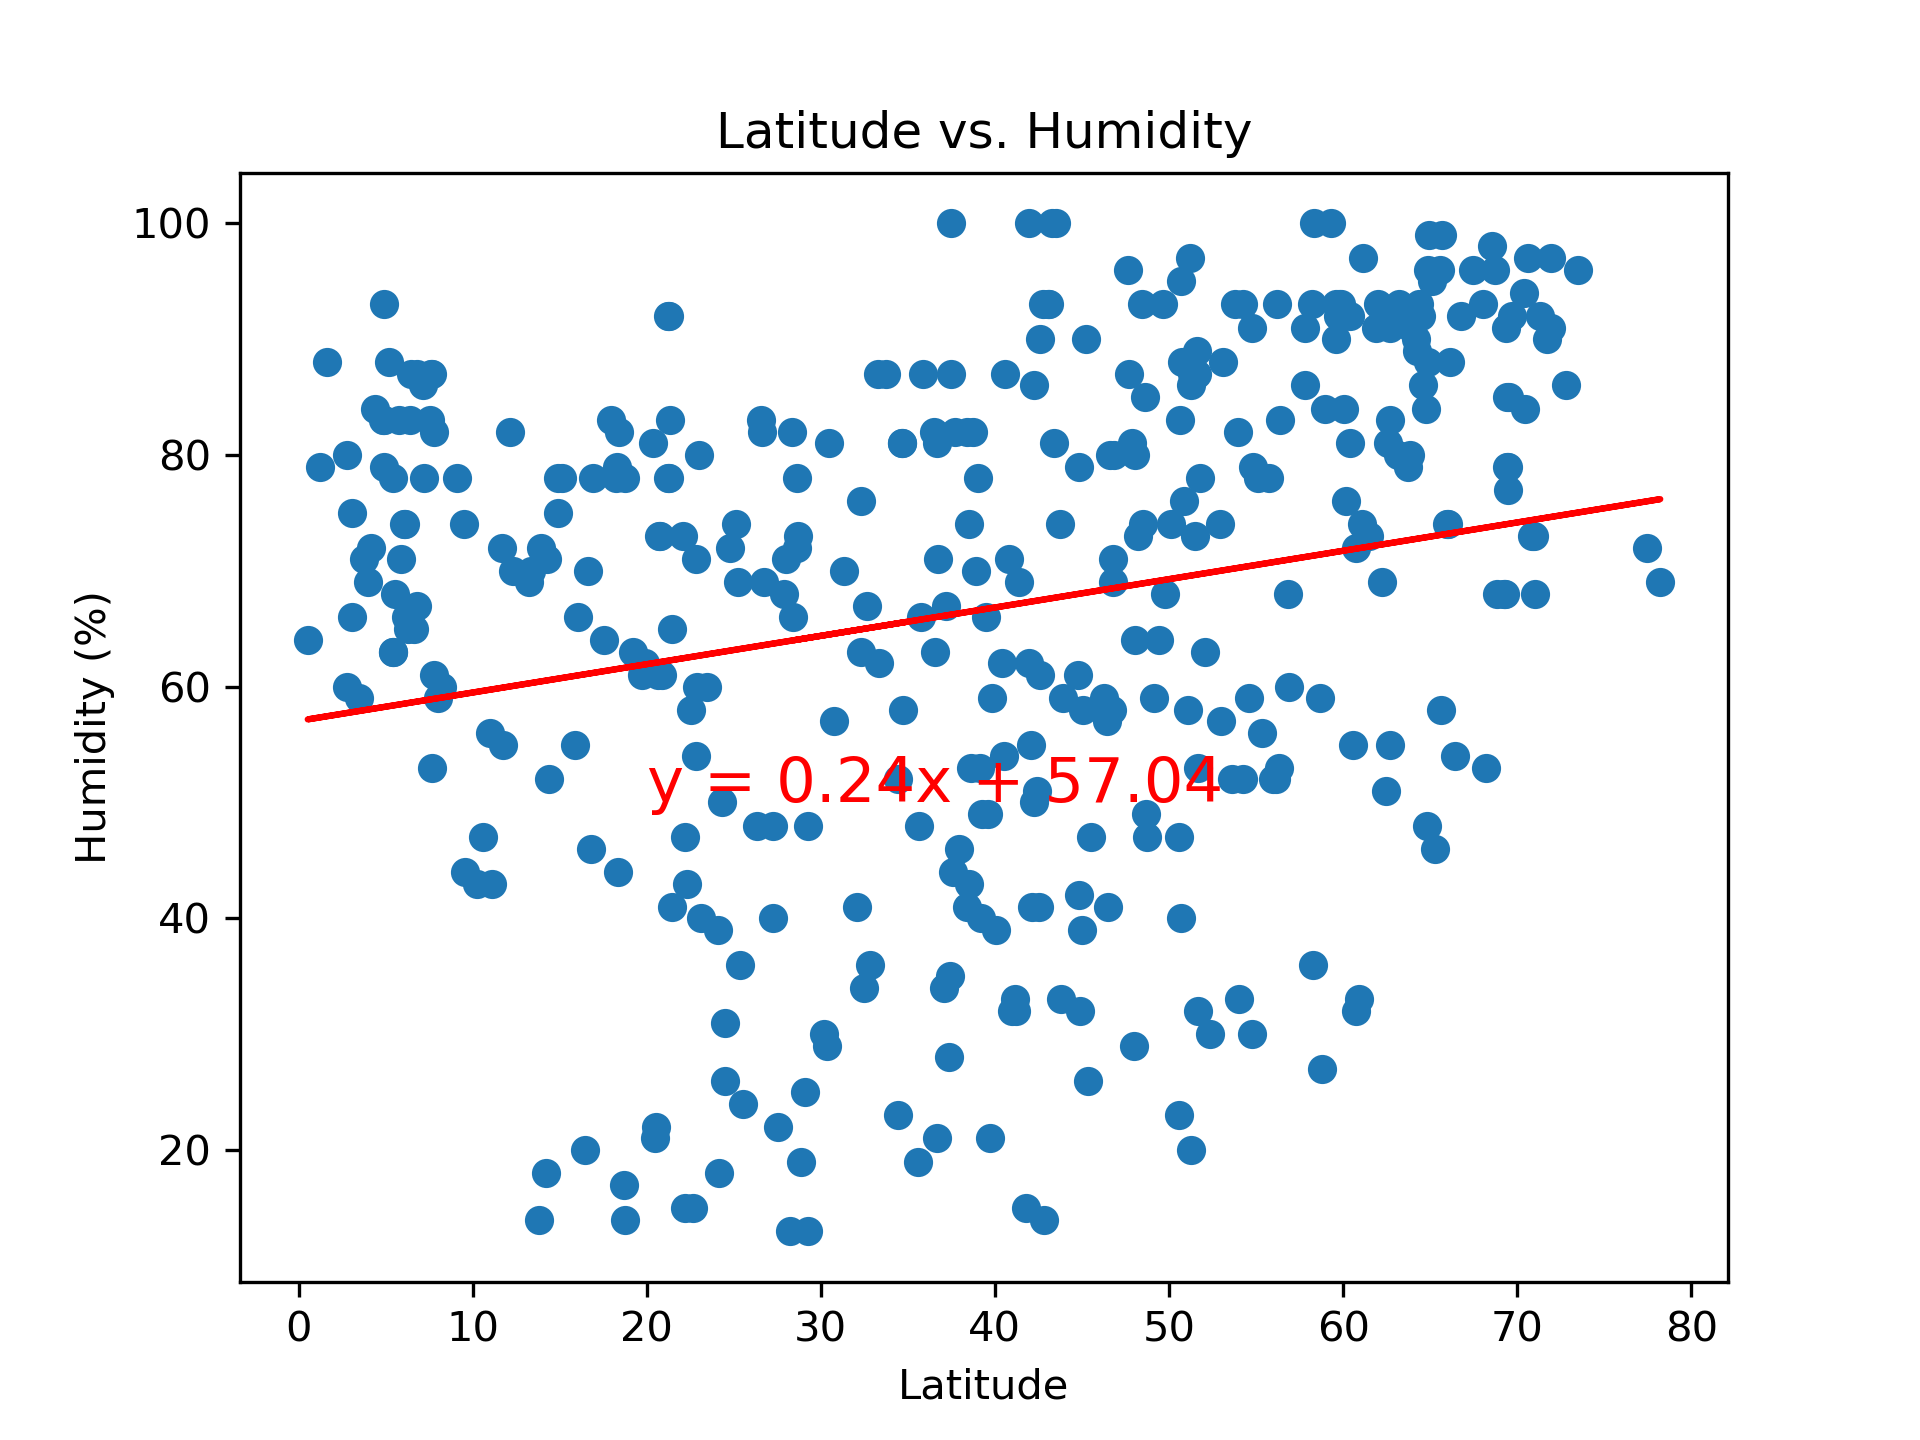

In [24]:
x_v2 = north_hem["Lat"]
y_v2 = north_hem["Humidity"]
plt.scatter(x_v2, y_v2)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_v2, y_v2)
regress_values = x_v2 * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_v2,regress_values,"r-")
plt.annotate(line_eq2, (20,50), fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Lat_Hum_LR.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2813401103773646


<IPython.core.display.Javascript object>


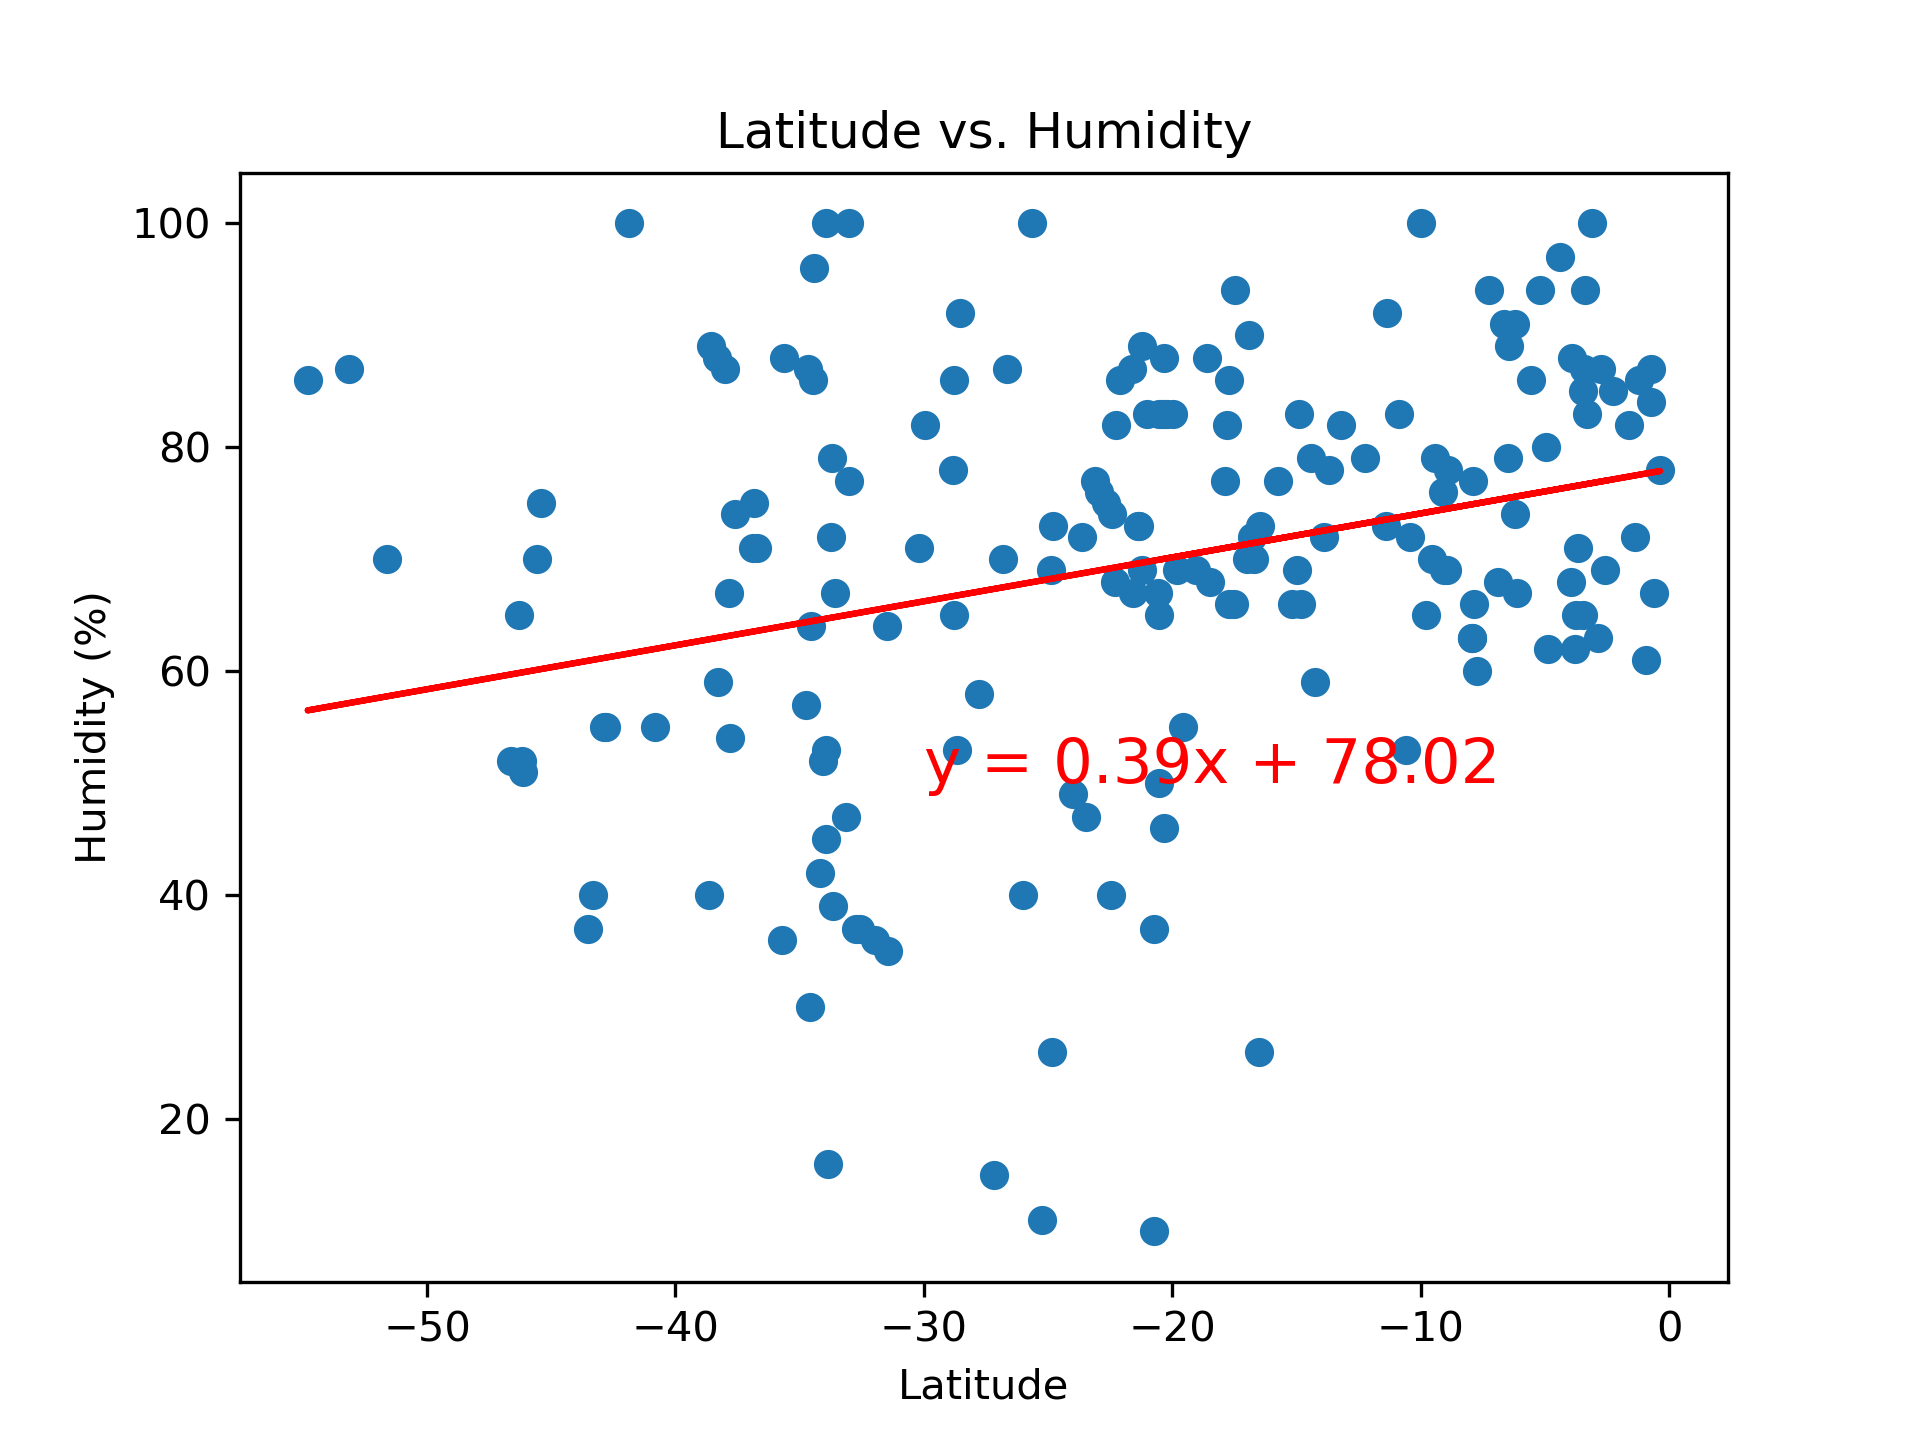

Now that I see the linear regression line, I now know that there is a positive correlation. As lat increases, so does humidity though it is a very weak correlation based off the r value(0= no correlation, 1 or -1 being direct correlation)


In [25]:
x_v3 = south_hem["Lat"]
y_v3 = south_hem["Humidity"]
plt.scatter(x_v3, y_v3)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_v3, y_v3)
regress_values = x_v3 * slope + intercept
line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_v3,regress_values,"r-")
plt.annotate(line_eq3, (-30,50), fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Lat_Hum_LRsouth.png")
plt.show()
print("Now that I see the linear regression line, I now know that there is a positive correlation. As lat increases, so does humidity though it is a very weak correlation based off the r value(0= no correlation, 1 or -1 being direct correlation)")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.16795135281194445


<IPython.core.display.Javascript object>


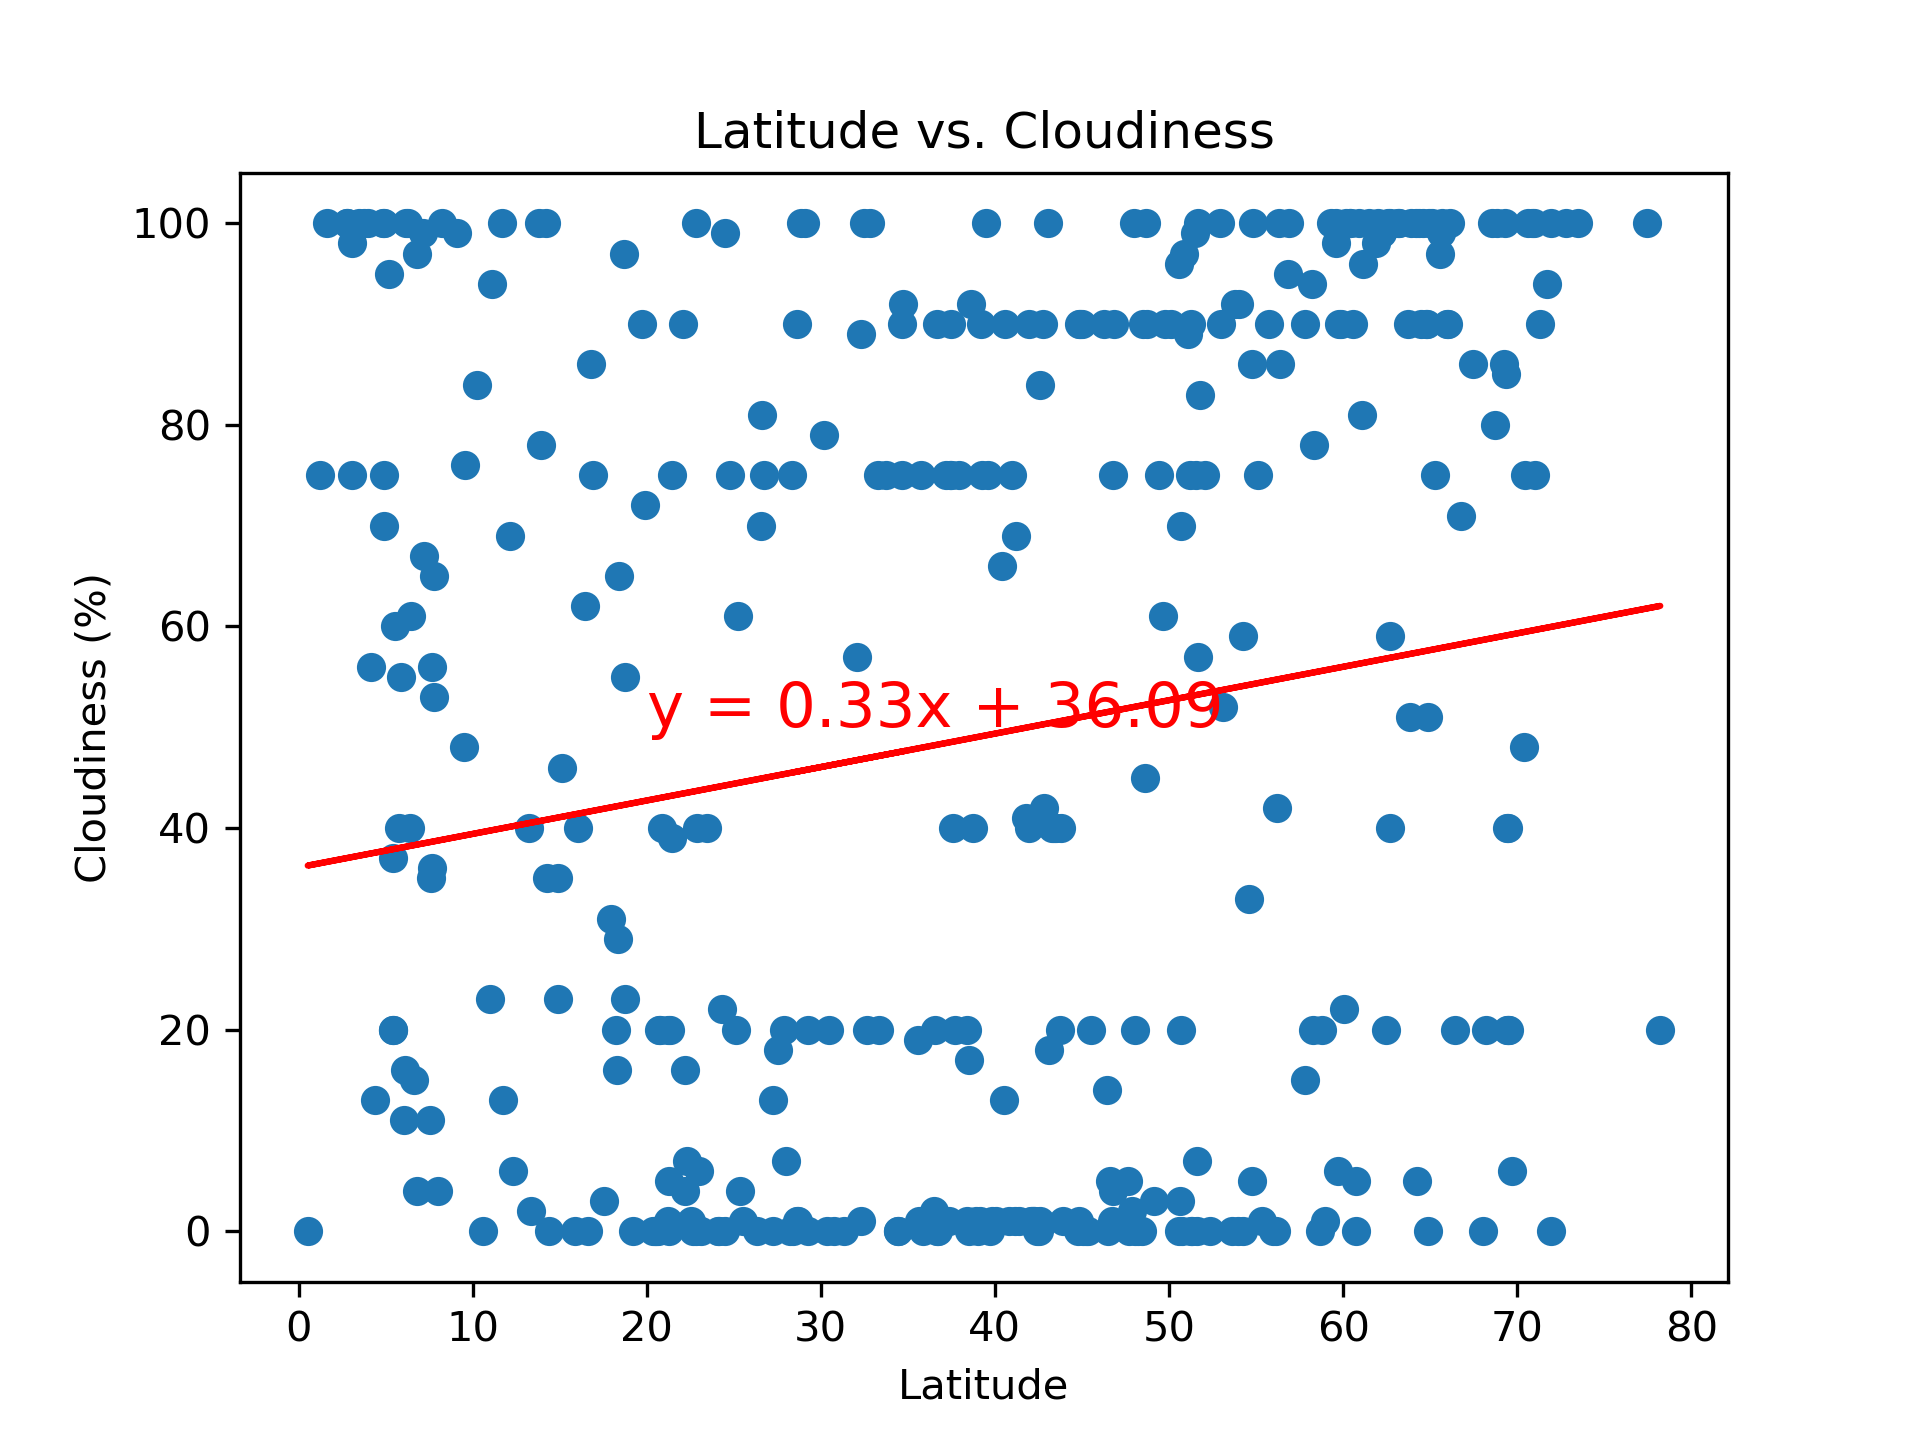

In [26]:
x_v2 = north_hem["Lat"]
y_v2 = north_hem["Cloudiness"]
plt.scatter(x_v2, y_v2)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_v2, y_v2)
regress_values = x_v2 * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_v2,regress_values,"r-")
plt.annotate(line_eq2, (20,50), fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Lat_Cloud_LR.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22855593651006642


<IPython.core.display.Javascript object>


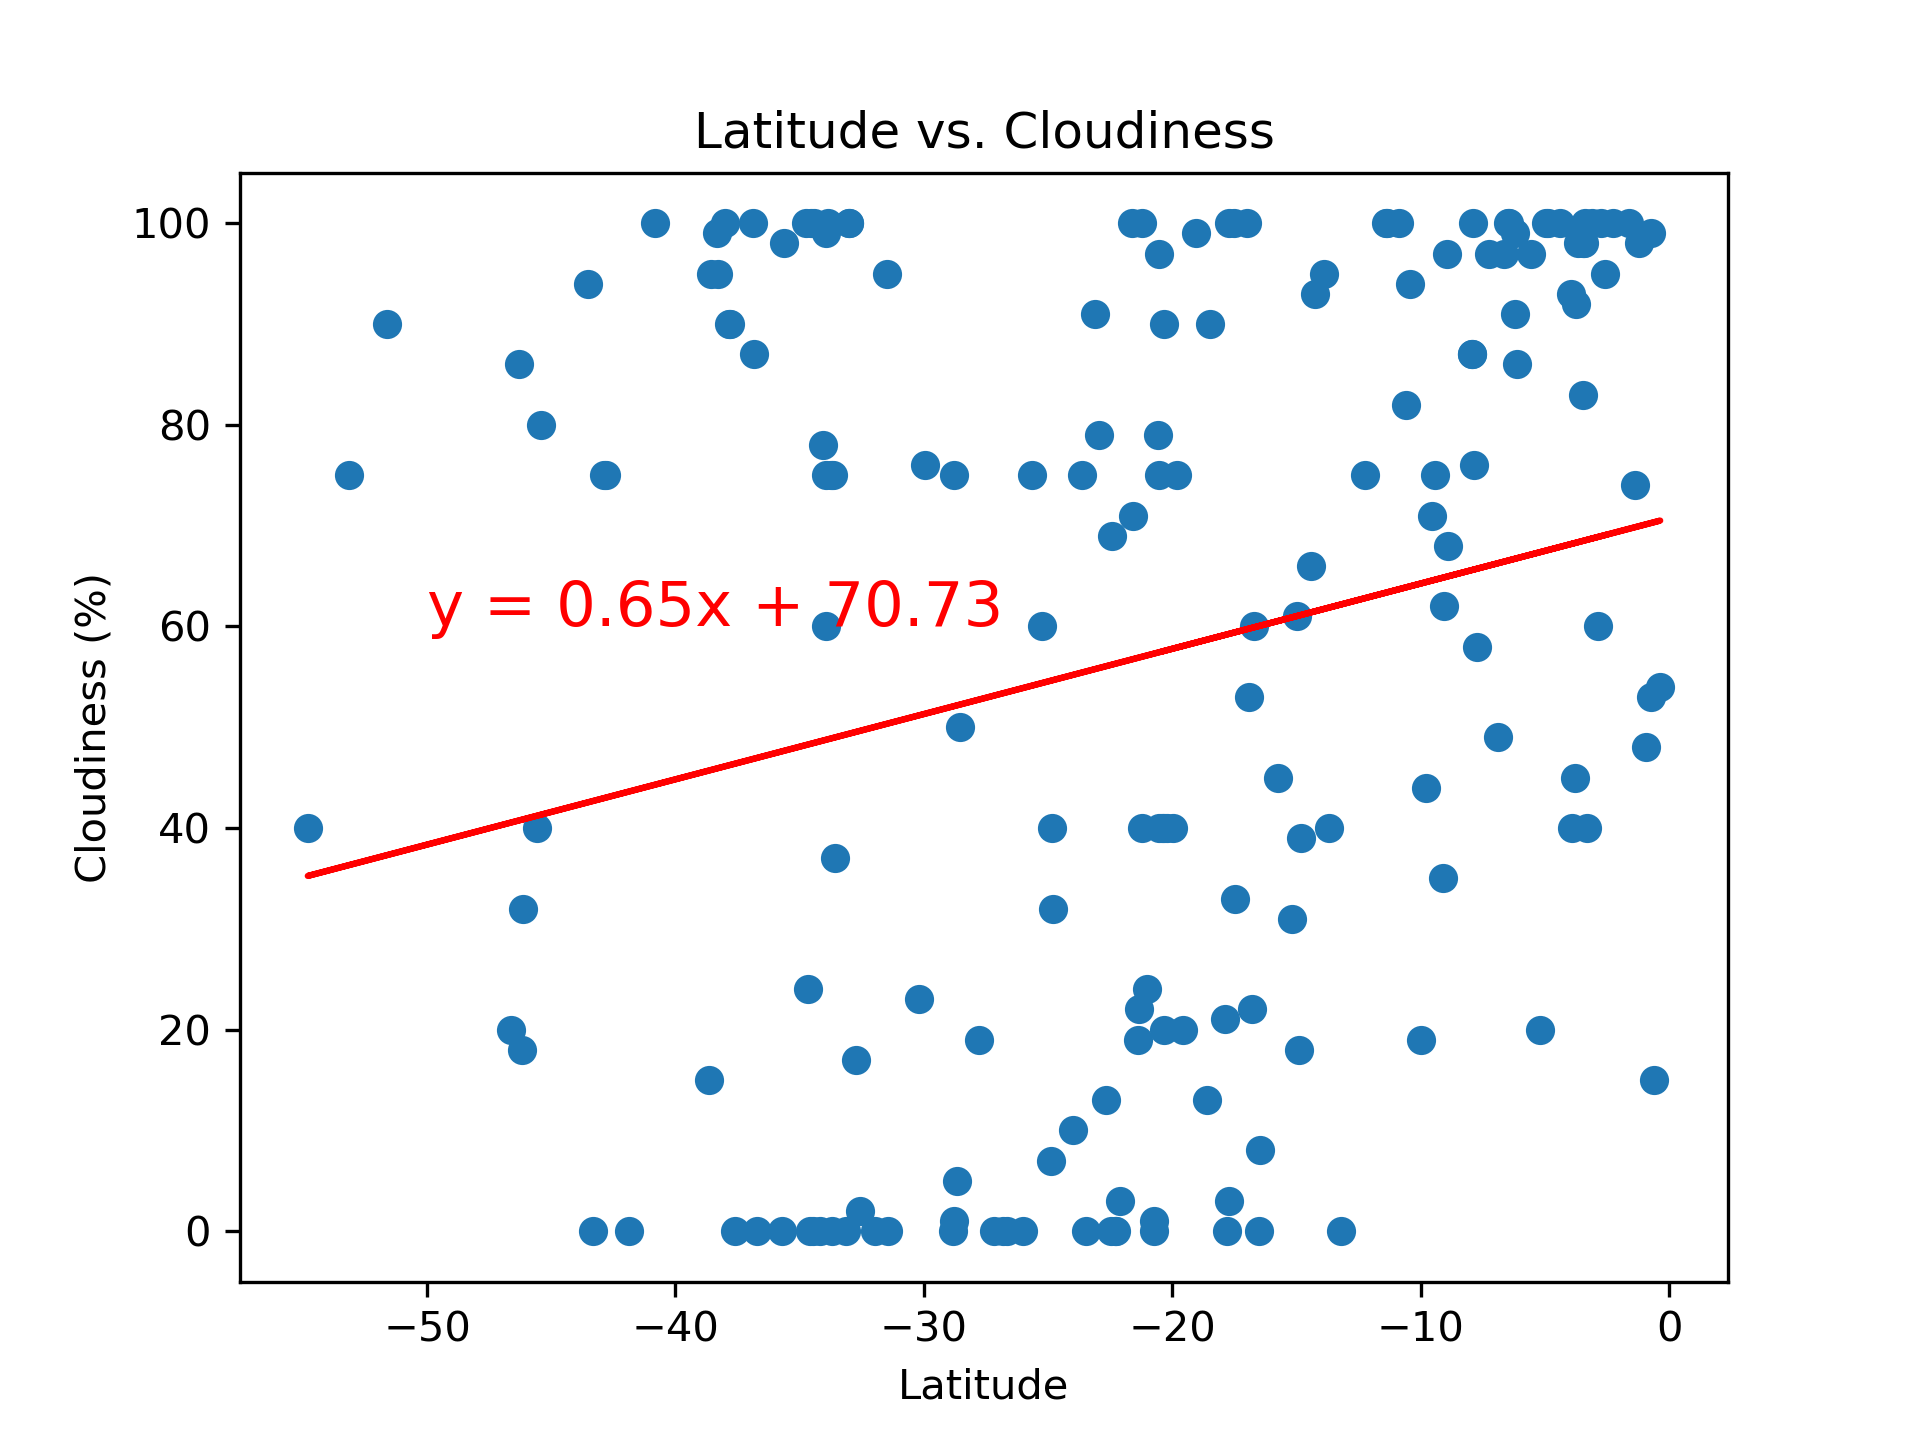

Again, there is a very little positive correlation between lat and cloudiness. Though, the slope of cloudiness is very similar to humidity. That makes sense as humidity begets clouds.


In [27]:
x_v2 = south_hem["Lat"]
y_v2 = south_hem["Cloudiness"]
plt.scatter(x_v2, y_v2)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_v2, y_v2)
regress_values = x_v2 * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_v2,regress_values,"r-")
plt.annotate(line_eq2, (-50,60), fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Lat_Cloud_LRsouth.png")
plt.show()
print("Again, there is a very little positive correlation between lat and cloudiness. Though, the slope of cloudiness is very similar to humidity. That makes sense as humidity begets clouds.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.2633141085144011


<IPython.core.display.Javascript object>


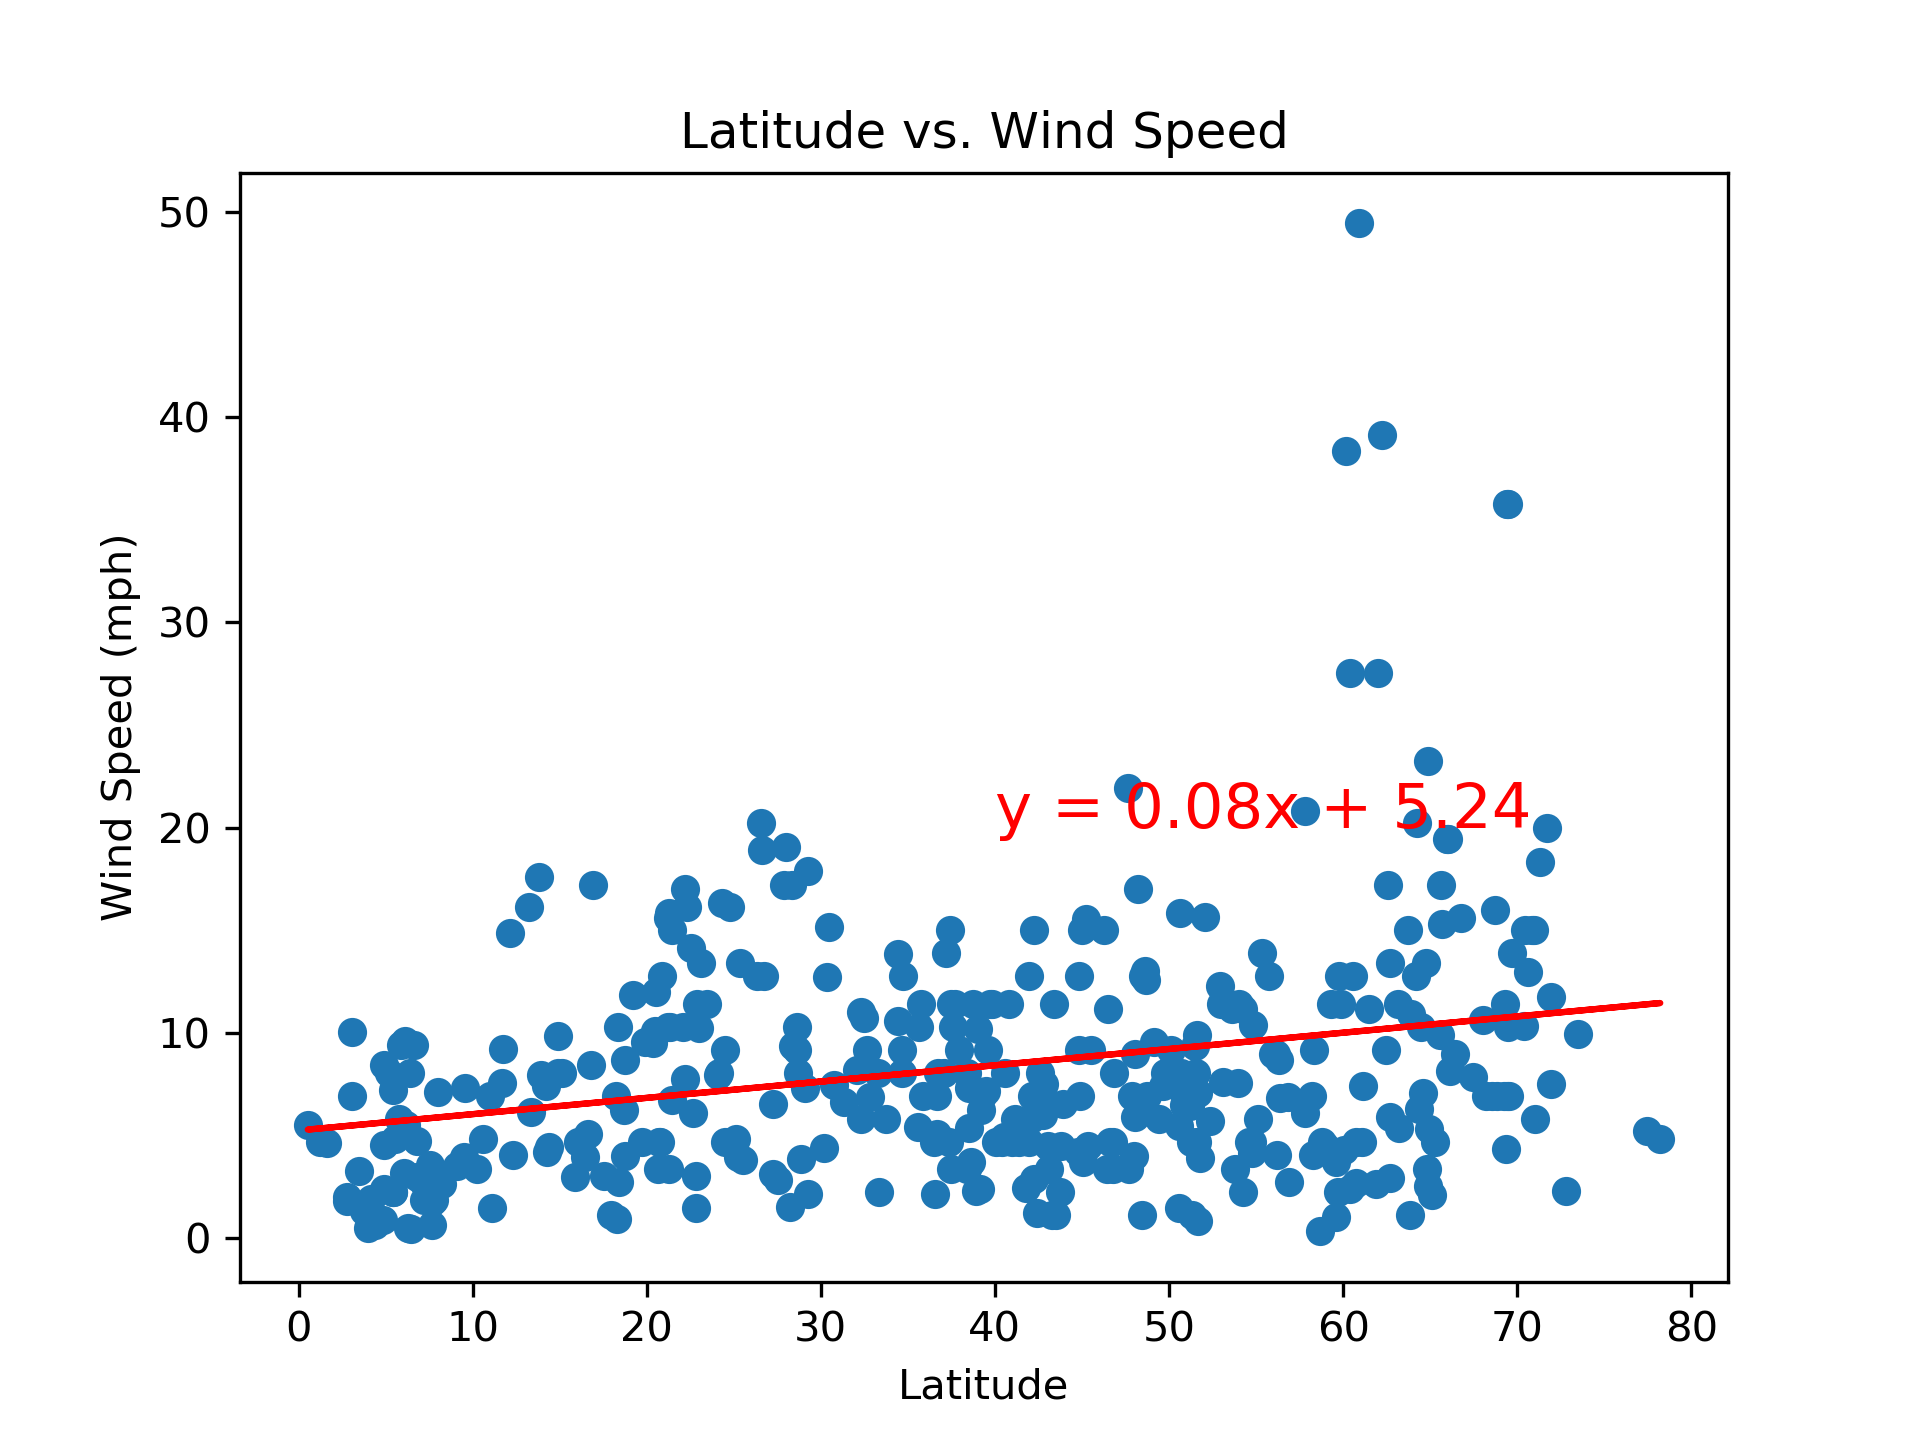

In [29]:
x_v2 = north_hem["Lat"]
y_v2 = north_hem["Wind Speed"]
plt.scatter(x_v2, y_v2)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_v2, y_v2)
regress_values = x_v2 * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_v2,regress_values,"r-")
plt.annotate(line_eq2, (40,20), fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Lat_Wind_LR.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.31478424389126564


<IPython.core.display.Javascript object>


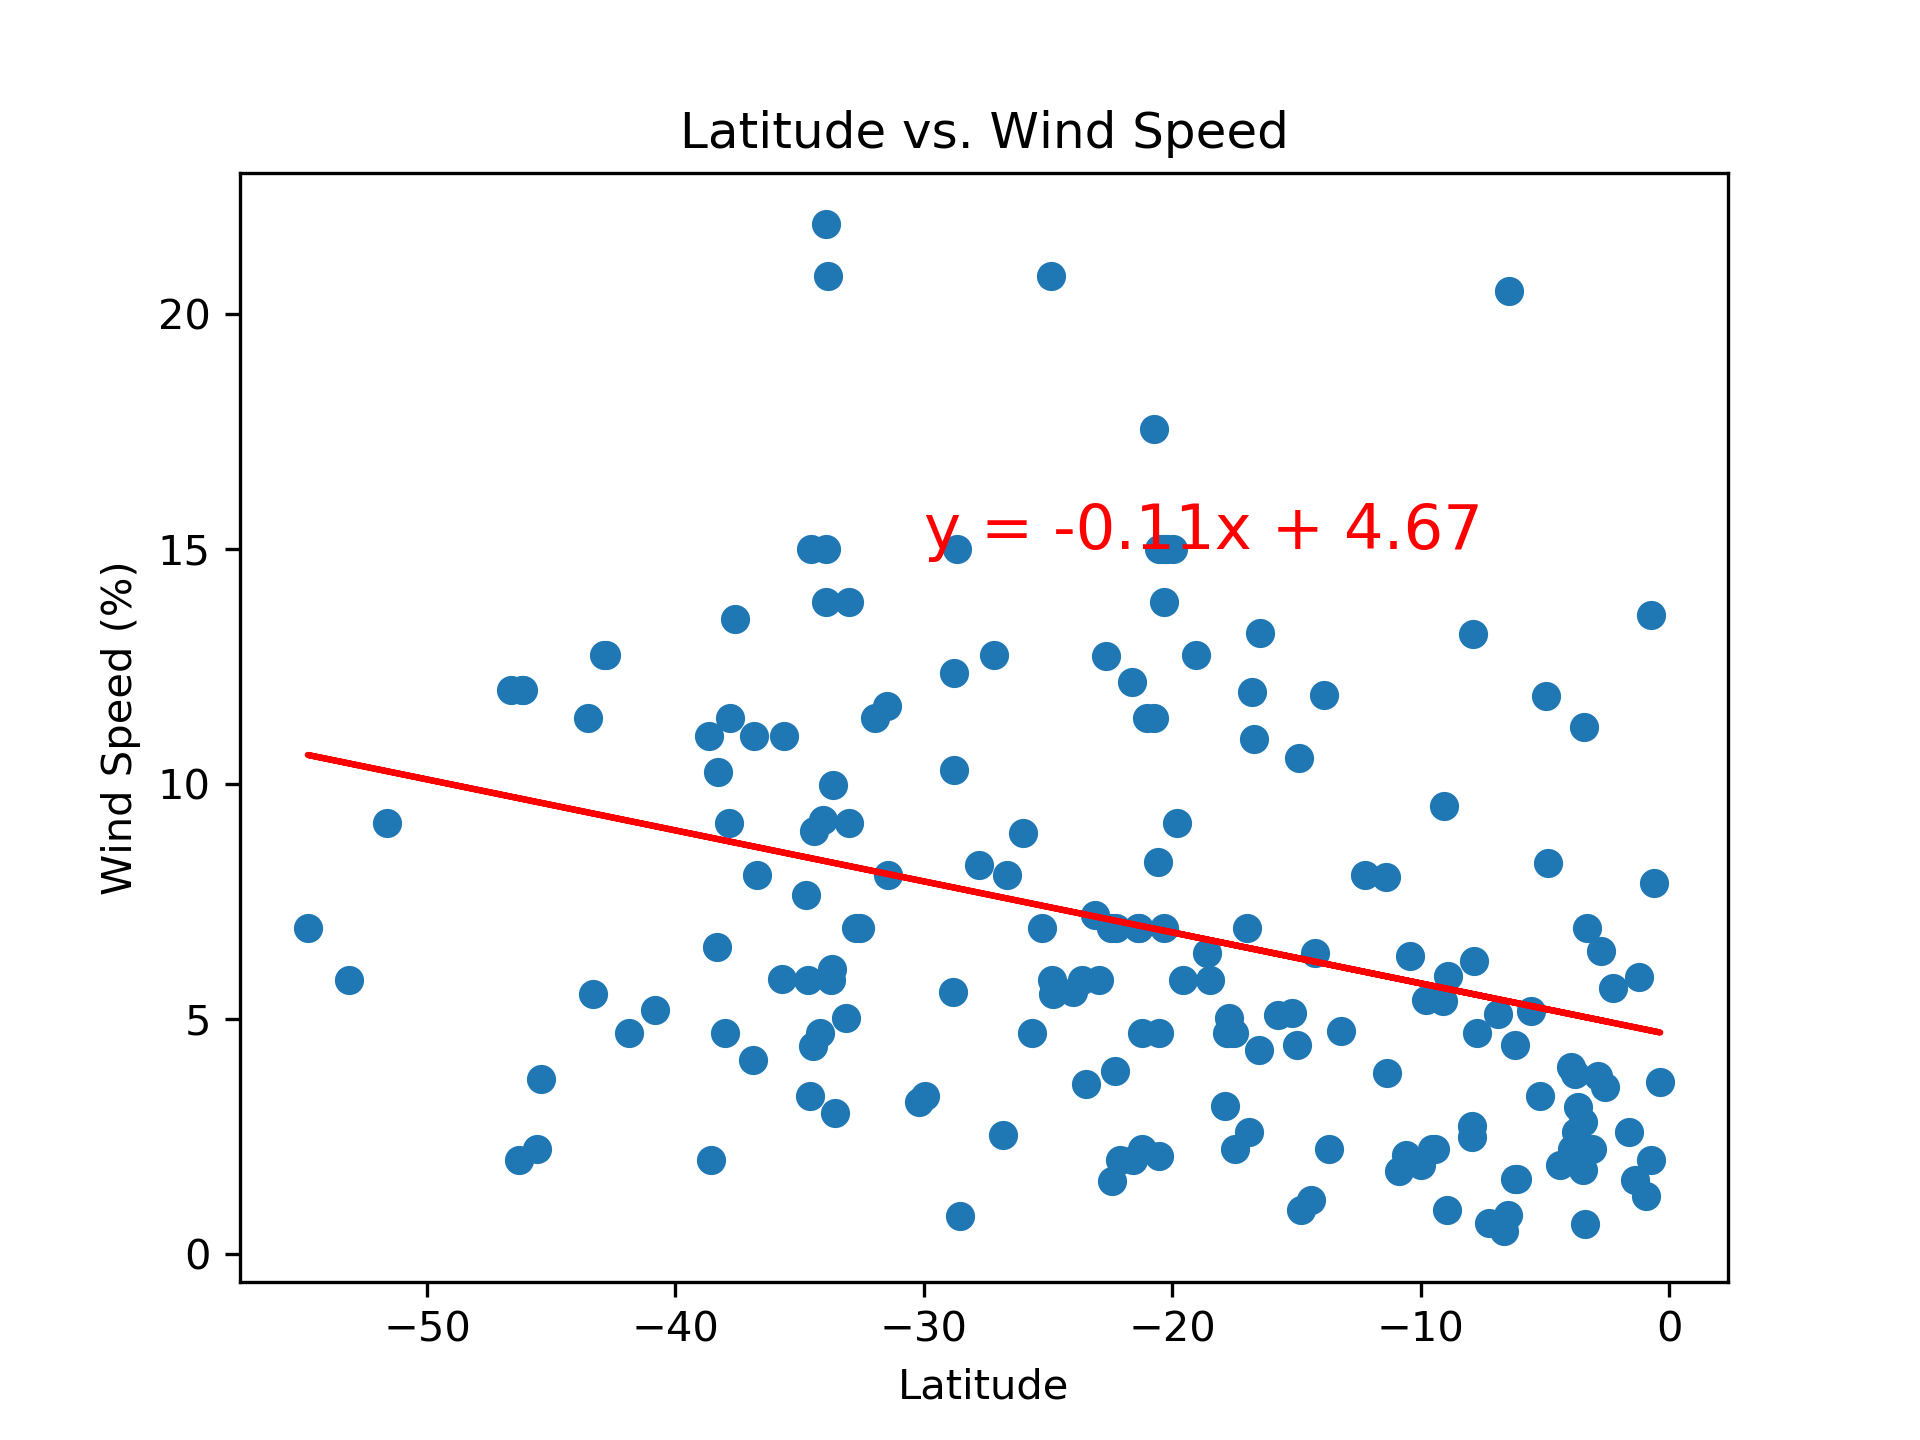

There is a correlation as lat moves away from the equator the wind speed picks up. Now that I see the linear regression line it is more obvious that it is probably because since Earth spins on the axes, more speed is picked up away from the equator (towards the axes). Though, the slope in the northern hemisphere is steeper. I am going to stick with my same hypothesis that there are more places inhabited in the northern hemisphere at higher altitudes.


In [30]:
x_v2 = south_hem["Lat"]
y_v2 = south_hem["Wind Speed"]
plt.scatter(x_v2, y_v2)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.title("Latitude vs. Wind Speed")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_v2, y_v2)
regress_values = x_v2 * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_v2,regress_values,"r-")
plt.annotate(line_eq2, (-30,15), fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Lat_Wind_LRsouth.png")
plt.show()
print("There is a correlation as lat moves away from the equator the wind speed picks up. Now that I see the linear regression line it is more obvious that it is probably because since Earth spins on the axes, more speed is picked up away from the equator (towards the axes). Though, the slope in the northern hemisphere is steeper. I am going to stick with my same hypothesis that there are more places inhabited in the northern hemisphere at higher altitudes.")